In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import skew
import numpy as np
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import cross_validate,KFold
from sklearn.preprocessing import MinMaxScaler
import pickle
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

In [129]:
df= pd.read_csv(r"C:\Users\ASUS\Documents\GUVI ZEN CLASSES\MAINT BOOT\Crime Analyser\Sample Crime Dataset - Sheet1.csv")
df.head()

ID Case Number           Date                      Block IUCR  \
0   5741943    HN549294   8/25/07 9:22         074XX N ROGERS AVE  560   
1     25953    JE240540  5/24/21 15:06        020XX N LARAMIE AVE  110   
2     26038    JE279849   6/26/21 9:24      062XX N MC CORMICK RD  110   
3  13279676    JG507211   11/9/23 7:30           019XX W BYRON ST  620   
4  13274752    JG501049  11/12/23 7:59  086XX S COTTAGE GROVE AVE  454   

  Primary Type                                        Description  \
0      ASSAULT                                             SIMPLE   
1     HOMICIDE                                FIRST DEGREE MURDER   
2     HOMICIDE                                FIRST DEGREE MURDER   
3     BURGLARY                                     UNLAWFUL ENTRY   
4      BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0                OTHER   False     False  ... 49.00            1.00       08A   
1               STREET    True     False  ... 36.00           19.00       01A   
2          PARKING LOT    True     False  ... 50.00           13.00       01A   
3            APARTMENT   False     False  ... 47.00            5.00         5   
4   SMALL RETAIL STORE    True     False  ...  6.00           44.00       08B   

   X Coordinate Y Coordinate  Year      Updated On  Latitude Longitude  \
0           NaN          NaN  2007   8/17/15 15:03       NaN       NaN   
1    1141387.00   1913179.00  2021  11/18/23 15:39     41.92    -87.76   
2    1152781.00   1941458.00  2021  11/18/23 15:39     42.00    -87.71   
3    1162518.00   1925906.00  2023  11/18/23 15:39     41.95    -87.68   
4    1183071.00   1847869.00  2023   12/9/23 15:41     41.74    -87.60   

                        Location  
0                            NaN  
1  (41.917838056, -87.755968972)  
2  (41.995219444, -87.713354912)  
3  (41.952345086, -87.677975059)  
4  (41.737750767, -87.604855911)  

[5 rows x 22 columns]

In [130]:
df.size

21978

In [131]:
print(f"rows : {df.shape[0]}")

rows : 999


In [132]:
print(f"columns : {df.shape[1]}")

columns : 22


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    999 non-null    int64  
 1   Case Number           999 non-null    object 
 2   Date                  999 non-null    object 
 3   Block                 999 non-null    object 
 4   IUCR                  999 non-null    object 
 5   Primary Type          999 non-null    object 
 6   Description           999 non-null    object 
 7   Location Description  997 non-null    object 
 8   Arrest                999 non-null    bool   
 9   Domestic              999 non-null    bool   
 10  Beat                  999 non-null    int64  
 11  District              999 non-null    int64  
 12  Ward                  998 non-null    float64
 13  Community Area        998 non-null    float64
 14  FBI Code              999 non-null    object 
 15  X Coordinate          9

In [134]:
df.duplicated().sum()

0

In [135]:
df.isna().sum()

ID                       0
Case Number              0
Date                     0
Block                    0
IUCR                     0
Primary Type             0
Description              0
Location Description     2
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                     1
Community Area           1
FBI Code                 0
X Coordinate            20
Y Coordinate            20
Year                     0
Updated On               0
Latitude                20
Longitude               20
Location                20
dtype: int64

In [136]:
df = df.dropna()

In [137]:
df.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [138]:
df.size

21494

In [139]:
print(f"rows:{df.shape[0]}")

rows:977


In [140]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [141]:
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%y %H:%M')

In [142]:
df['Updated On'] = pd.to_datetime(df['Updated On'],format='%m/%d/%y %H:%M')

In [143]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                            object
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                        object
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On              datetime64[ns]
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [144]:
df.describe()

ID                           Date    Beat  District   Ward  \
count      977.00                            977  977.00    977.00 977.00   
mean  13116658.13  2023-08-10 02:27:12.282497536 1156.34     11.34  22.82   
min      25953.00            2010-11-19 09:00:00  111.00      1.00   1.00   
25%   13201686.00            2023-09-06 01:30:00  522.00      5.00   9.00   
50%   13202295.00            2023-09-06 13:30:00 1112.00     11.00  21.00   
75%   13203709.00            2023-09-06 20:30:00 1731.00     17.00  34.00   
max   13280139.00            2023-11-12 07:59:00 2534.00     25.00  50.00   
std     961271.38                            NaN  725.51      7.26  14.33   

       Community Area  X Coordinate  Y Coordinate    Year  \
count          977.00        977.00        977.00  977.00   
mean            36.19    1165622.47    1887860.99 2022.94   
min              1.00    1100658.00    1815536.00 2010.00   
25%             21.00    1153756.00    1858258.00 2023.00   
50%             32.00    1166921.00    1894597.00 2023.00   
75%             53.00    1176963.00    1913079.00 2023.00   
max             77.00    1203499.00    1950688.00 2023.00   
std             21.66      16477.40      32955.17    0.55   

                          Updated On  Latitude  Longitude  
count                            977    977.00     977.00  
mean   2023-09-19 02:11:41.023541248     41.85     -87.67  
min              2023-09-14 15:41:00     41.65     -87.91  
25%              2023-09-14 15:43:00     41.77     -87.71  
50%              2023-09-14 15:43:00     41.87     -87.66  
75%              2023-09-14 15:43:00     41.92     -87.63  
max              2024-05-24 15:40:00     42.02     -87.53  
std                              NaN      0.09       0.06

In [145]:
df['month_name'] = df['Date'].dt.month_name()

In [146]:
df['day'] = df['Date'].dt.day_name()

In [147]:
df['hour'] = df['Date'].dt.hour

In [148]:
df['year'] = df['Date'].dt.year

## Numerical columns extraction ##

In [149]:
num_cols = df.select_dtypes(include='number')

In [150]:
num_cols_1 = num_cols.drop(['Year','Latitude','Longitude','hour','year','X Coordinate','Y Coordinate','ID'],axis=1)
num_cols_1

Beat  District  Ward  Community Area
1    2515        25 36.00           19.00
2    1711        17 50.00           13.00
3    1922        19 47.00            5.00
4     632         6  6.00           44.00
6     122         1 42.00           32.00
..    ...       ...   ...             ...
994   131         1  3.00           33.00
995   323         3  6.00           69.00
996   732         7  6.00           68.00
997   424         4 10.00           46.00
998   332         3  5.00           43.00

[977 rows x 4 columns]

## Null values checking ##

In [151]:
df.isna().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
month_name              0
day                     0
hour                    0
year                    0
dtype: int64

## Data Distribution - Measure of skewness ##

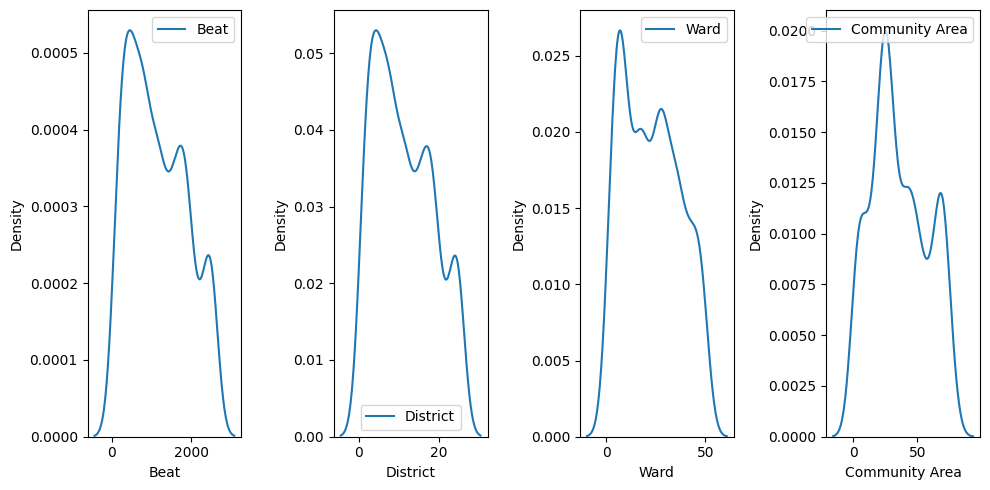

In [152]:
plt.figure(figsize=(10,5))
for i,col in enumerate(num_cols_1,1):
    plt.subplot(1,4,i)
    sns.kdeplot(df[col],label=col)
    plt.legend()
plt.tight_layout()
plt.show()

In [153]:
for col in num_cols_1:
    print(f"{col} : {(skew(df[col]))}")

Beat : 0.35649536946019966
District : 0.3583774040132764
Ward : 0.2202419367053774
Community Area : 0.2242397678011052


## Outliers ##

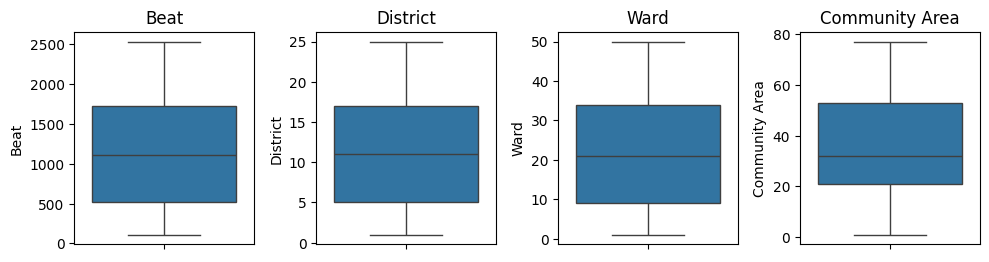

In [154]:
plt.figure(figsize=(10,5))
for i,col in enumerate(num_cols_1,1):
    plt.subplot(2,4,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Temporal Analysis #

## Crime trends over time ##

In [155]:
df['month_name'] = df['Date'].dt.month_name()

In [156]:
df['day'] = df['Date'].dt.day_name()

In [157]:
df['hour'] = df['Date'].dt.hour

In [158]:
df['year'] = df['Date'].dt.year

In [159]:
df[['year','month_name','day','hour']]

year month_name        day  hour
1    2021        May     Monday    15
2    2021       June   Saturday     9
3    2023   November   Thursday     7
4    2023   November     Sunday     7
6    2023  September  Wednesday    17
..    ...        ...        ...   ...
994  2023  September   Thursday    20
995  2023  September   Thursday     0
996  2023  September   Thursday    13
997  2023  September   Thursday    20
998  2023  September    Tuesday     2

[977 rows x 4 columns]

In [160]:
crime_grp = df.groupby('Primary Type')

## Yearwise Crime Occurence ##

In [161]:
no_of_crime_year = crime_grp['Year'].value_counts().sort_values(ascending=False)
crime_yr_df = pd.DataFrame(no_of_crime_year).reset_index()
crime_yr_df

Primary Type  Year  count
0                               THEFT  2023    201
1                             BATTERY  2023    146
2                     CRIMINAL DAMAGE  2023    111
3                 MOTOR VEHICLE THEFT  2023    101
4                             ASSAULT  2023     94
5                  DECEPTIVE PRACTICE  2023     63
6                       OTHER OFFENSE  2023     51
7                            BURGLARY  2023     37
8                             ROBBERY  2023     33
9                   WEAPONS VIOLATION  2023     24
10                  CRIMINAL TRESPASS  2023     19
11                        SEX OFFENSE  2023     18
12         OFFENSE INVOLVING CHILDREN  2023     13
13                          NARCOTICS  2023     13
14            CRIMINAL SEXUAL ASSAULT  2023      6
15                           STALKING  2023      4
16                              ARSON  2023      4
17                            BATTERY  2022      4
18                            ROBBERY  2022      3
19                           HOMICIDE  2021      3
20                       PROSTITUTION  2023      3
21             PUBLIC PEACE VIOLATION  2023      3
22                        SEX OFFENSE  2022      3
23                           HOMICIDE  2023      2
24                      OTHER OFFENSE  2022      2
25                            ROBBERY  2019      2
26            CRIMINAL SEXUAL ASSAULT  2018      1
27                              THEFT  2022      1
28                              THEFT  2019      1
29                           BURGLARY  2022      1
30  CONCEALED CARRY LICENSE VIOLATION  2023      1
31                         KIDNAPPING  2023      1
32                            ROBBERY  2021      1
33                            ROBBERY  2010      1
34   INTERFERENCE WITH PUBLIC OFFICER  2023      1
35            CRIMINAL SEXUAL ASSAULT  2020      1
36            CRIMINAL SEXUAL ASSAULT  2022      1
37         OFFENSE INVOLVING CHILDREN  2022      1
38         OFFENSE INVOLVING CHILDREN  2019      1
39                  WEAPONS VIOLATION  2022      1

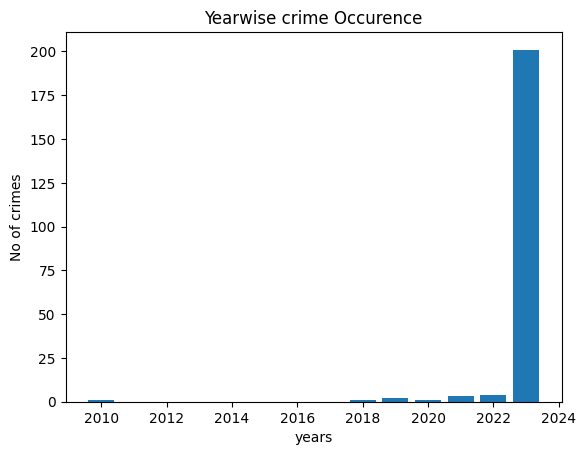

In [162]:
plt.bar(crime_yr_df['Year'],crime_yr_df['count'])
plt.xlabel("years")
plt.ylabel("No of crimes")
plt.title('Yearwise crime Occurence')
plt.show()

## Monthwise Crime Occurence ##

In [163]:
no_of_crime_month = crime_grp[['month_name']].value_counts().sort_values(ascending=False)
crime_month_df = pd.DataFrame(no_of_crime_month).reset_index()
crime_month_df

Primary Type month_name  count
0                        THEFT  September    160
1                      BATTERY  September    131
2              CRIMINAL DAMAGE  September     99
3                      ASSAULT  September     88
4          MOTOR VEHICLE THEFT  September     80
..                         ...        ...    ...
85         MOTOR VEHICLE THEFT        May      1
86  OFFENSE INVOLVING CHILDREN    January      1
87  OFFENSE INVOLVING CHILDREN       July      1
88  OFFENSE INVOLVING CHILDREN        May      1
89           WEAPONS VIOLATION   November      1

[90 rows x 3 columns]

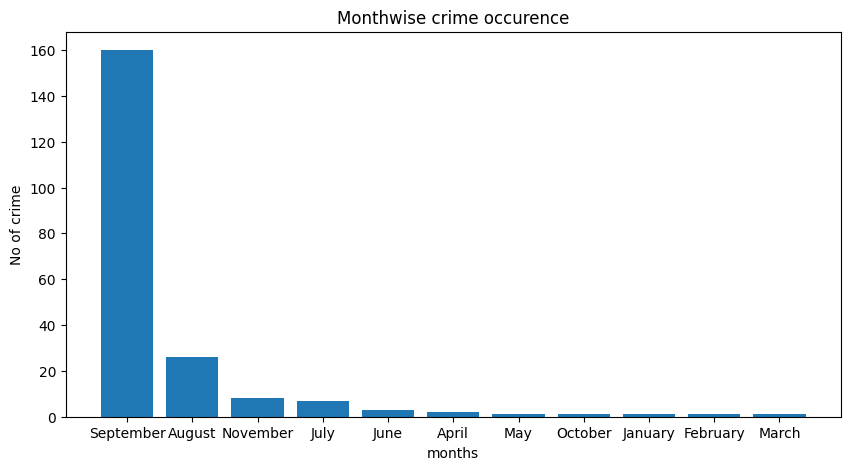

In [164]:
plt.figure(figsize=(10,5))
plt.bar(crime_month_df['month_name'],crime_month_df['count'])
plt.xlabel('months')
plt.ylabel('No of crime')
plt.title('Monthwise crime occurence')
plt.show()

## Daywise Crime Occurence ##

In [165]:
no_of_crime_day = crime_grp[['Year','month_name','day']].value_counts().sort_values(ascending=False)
crime_day_df = pd.DataFrame(no_of_crime_day).reset_index()
crime_day_df

Primary Type  Year month_name        day  count
0                      THEFT  2023  September  Wednesday    133
1                    BATTERY  2023  September  Wednesday    106
2            CRIMINAL DAMAGE  2023  September  Wednesday     83
3                    ASSAULT  2023  September  Wednesday     75
4        MOTOR VEHICLE THEFT  2023  September  Wednesday     69
..                       ...   ...        ...        ...    ...
178        CRIMINAL TRESPASS  2023     August   Saturday      1
179        CRIMINAL TRESPASS  2023     August     Monday      1
180  CRIMINAL SEXUAL ASSAULT  2023       July     Monday      1
181  CRIMINAL SEXUAL ASSAULT  2023     August     Friday      1
182        WEAPONS VIOLATION  2023     August     Friday      1

[183 rows x 5 columns]

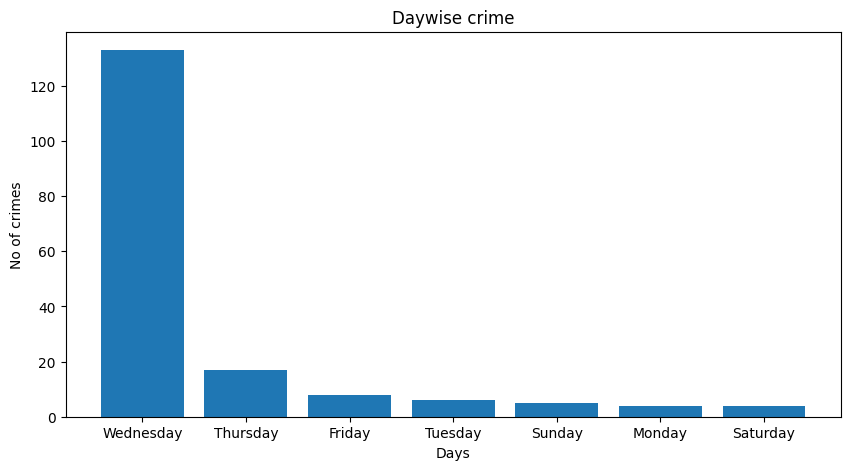

In [166]:
plt.figure(figsize=(10,5))
plt.bar(crime_day_df['day'],crime_day_df['count'])
plt.xlabel('Days')
plt.ylabel('No of crimes')
plt.title('Daywise crime')
plt.show()

## Hourwise Crime Occurence ##

In [167]:
no_of_crime_hour =  crime_grp[['Date','hour']].value_counts().sort_values(ascending=False)
crime_hour_df = pd.DataFrame(no_of_crime_hour).reset_index()
crime_hour_df

Primary Type                Date  hour  count
0        CRIMINAL DAMAGE 2023-09-06 18:00:00    18     10
1    MOTOR VEHICLE THEFT 2023-09-06 19:00:00    19      7
2    MOTOR VEHICLE THEFT 2023-09-06 22:00:00    22      5
3                  THEFT 2023-09-06 02:00:00     2      5
4                  THEFT 2023-09-06 18:00:00    18      5
..                   ...                 ...   ...    ...
844      CRIMINAL DAMAGE 2023-09-06 12:30:00    12      1
845      CRIMINAL DAMAGE 2023-09-06 12:36:00    12      1
846      CRIMINAL DAMAGE 2023-09-06 13:10:00    13      1
847      CRIMINAL DAMAGE 2023-09-06 14:00:00    14      1
848    WEAPONS VIOLATION 2023-09-07 17:40:00    17      1

[849 rows x 4 columns]

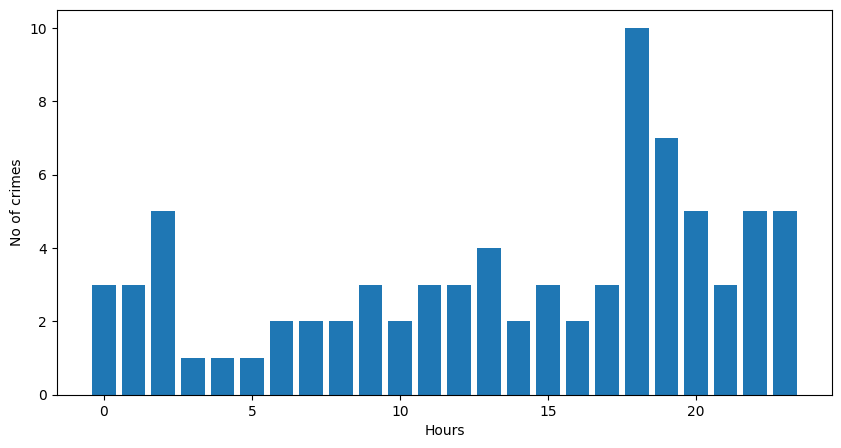

In [168]:
plt.figure(figsize=(10,5))
plt.bar(crime_hour_df['hour'],crime_hour_df['count'])
plt.xlabel('Hours')
plt.ylabel('No of crimes')
plt.show()

## Location-specific Analysis ##

### Areas where more crimes are happening? ###

In [169]:
data = df[['Primary Type','Location Description']].value_counts()
crime_area_df = pd.DataFrame(data).reset_index()
crime_area_df


Primary Type  Location Description  count
0    MOTOR VEHICLE THEFT                STREET     70
1                  THEFT                STREET     60
2        CRIMINAL DAMAGE                STREET     54
3                BATTERY             APARTMENT     43
4                ASSAULT             APARTMENT     28
..                   ...                   ...    ...
241   DECEPTIVE PRACTICE              SIDEWALK      1
242                ARSON             APARTMENT      1
243   DECEPTIVE PRACTICE  VEHICLE - COMMERCIAL      1
244             HOMICIDE                 ALLEY      1
245                ARSON                 ALLEY      1

[246 rows x 3 columns]

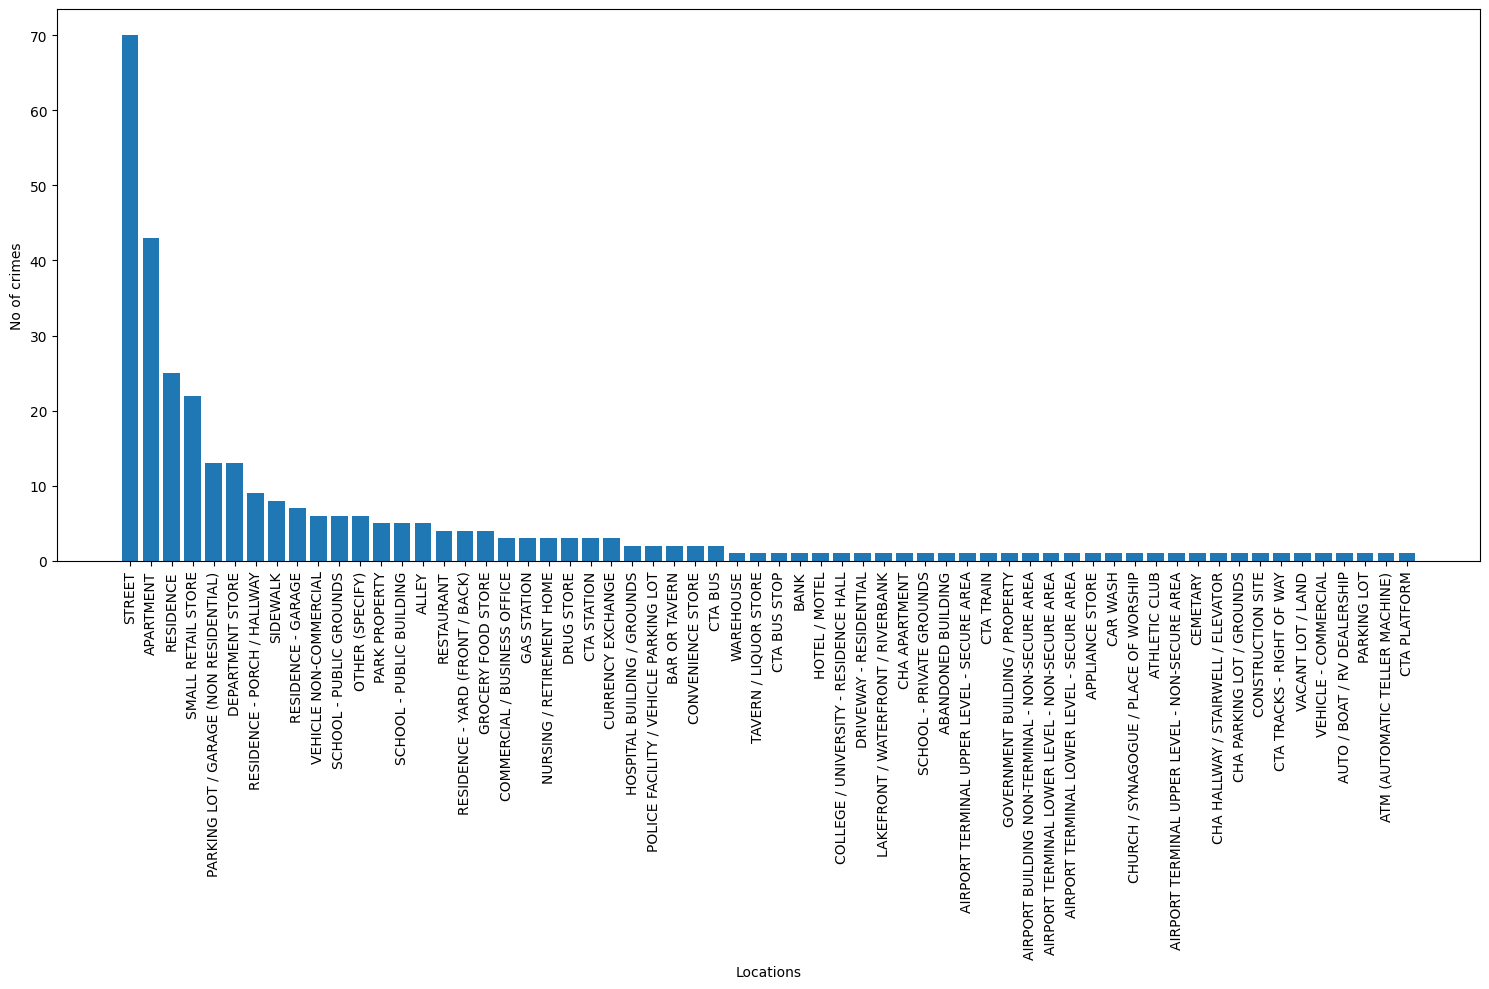

In [170]:
plt.figure(figsize=(15,10))
plt.bar(crime_area_df['Location Description'],crime_area_df['count'])
plt.xticks(rotation=90)
plt.xlabel('Locations')
plt.ylabel('No of crimes')
plt.tight_layout()
plt.show()

## Crime pattern Analysis ##

In [171]:
data_9 = crime_grp['Community Area'].value_counts().sort_values(ascending=False)
com_area_df = pd.DataFrame(data_9).reset_index()
com_area_df

Primary Type  Community Area  count
0                 THEFT           24.00     14
1       CRIMINAL DAMAGE           39.00     13
2                 THEFT           28.00     13
3                 THEFT           22.00     11
4                 THEFT           32.00     10
..                  ...             ...    ...
474  DECEPTIVE PRACTICE           23.00      1
475  DECEPTIVE PRACTICE           22.00      1
476  DECEPTIVE PRACTICE           17.00      1
477  DECEPTIVE PRACTICE            6.00      1
478   WEAPONS VIOLATION           75.00      1

[479 rows x 3 columns]

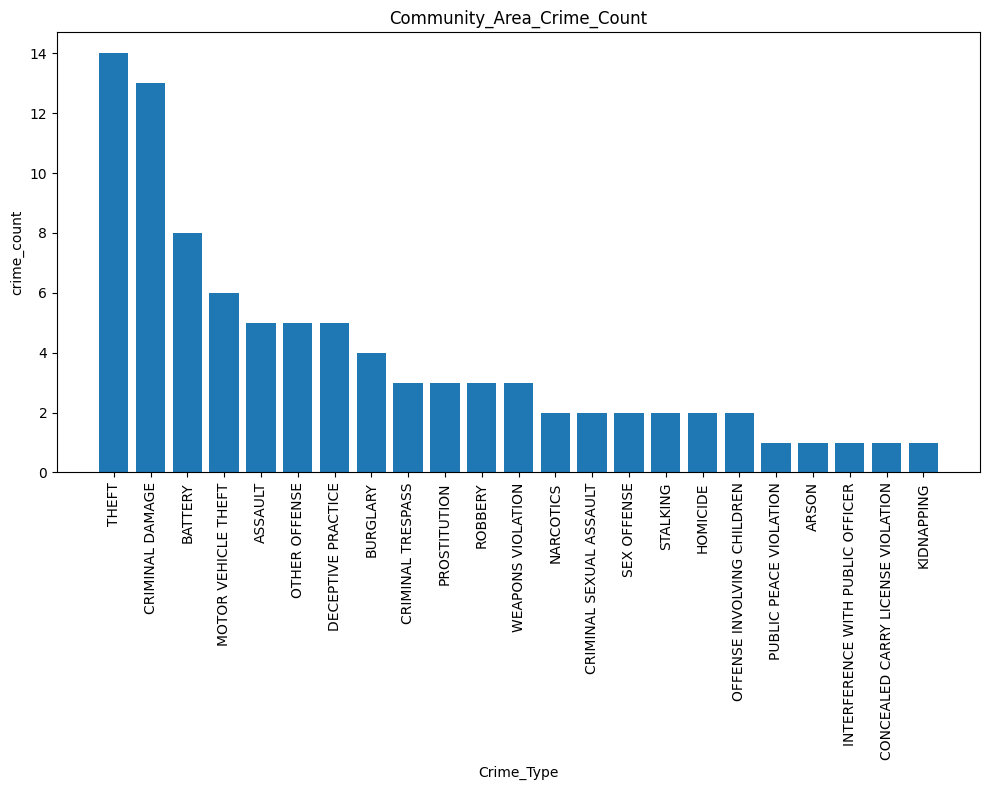

In [172]:
plt.figure(figsize=(10,8))
plt.bar(com_area_df['Primary Type'],com_area_df['count'])
plt.xticks(rotation=90)
plt.xlabel('Crime_Type')
plt.ylabel('crime_count')
plt.title('Community_Area_Crime_Count')
plt.tight_layout()
plt.show()

In [173]:
data_10 = crime_grp['Beat'].value_counts().sort_values(ascending=False)
beat_df = pd.DataFrame(data_10).reset_index()
beat_df

Primary Type  Beat  count
0      CRIMINAL DAMAGE   222     13
1                THEFT   222      5
2                THEFT  1424      5
3                THEFT  1934      4
4      CRIMINAL DAMAGE  1915      4
..                 ...   ...    ...
744    CRIMINAL DAMAGE  1922      1
745    CRIMINAL DAMAGE  1925      1
746    CRIMINAL DAMAGE  2022      1
747    CRIMINAL DAMAGE  2031      1
748  WEAPONS VIOLATION  2525      1

[749 rows x 3 columns]

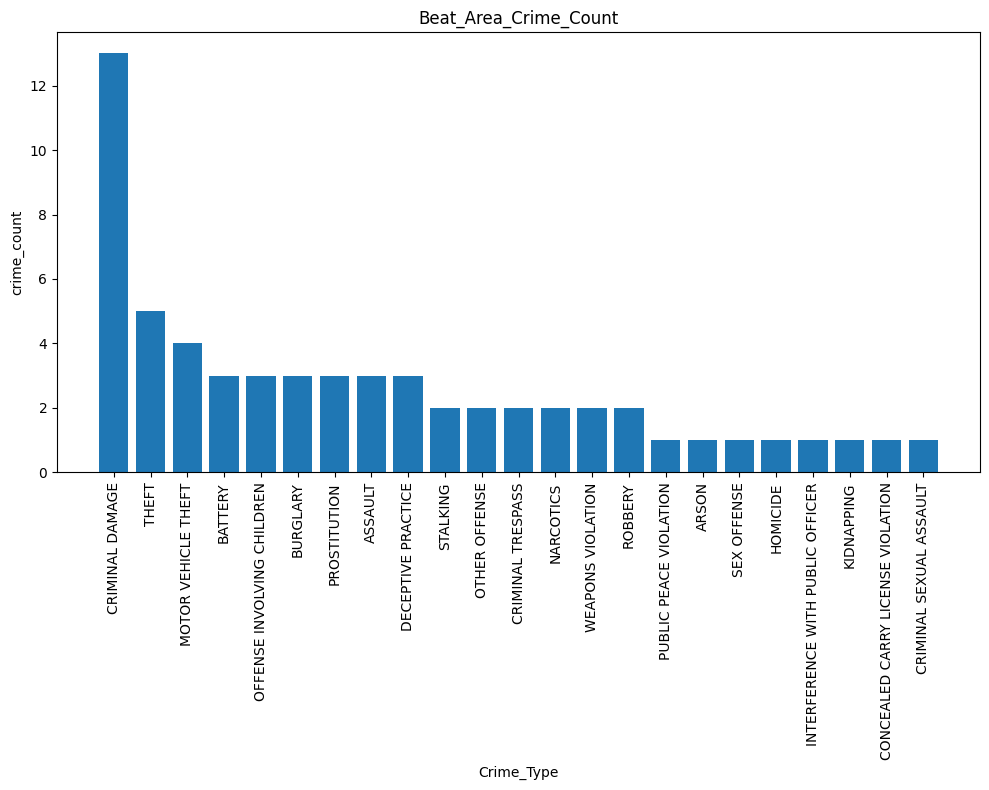

In [174]:
plt.figure(figsize=(10,8))
plt.bar(beat_df['Primary Type'],beat_df['count'])
plt.xticks(rotation=90)
plt.xlabel('Crime_Type')
plt.ylabel('crime_count')
plt.title('Beat_Area_Crime_Count')
plt.tight_layout()
plt.show()

## Community_area_crime vs Beat_crime ##

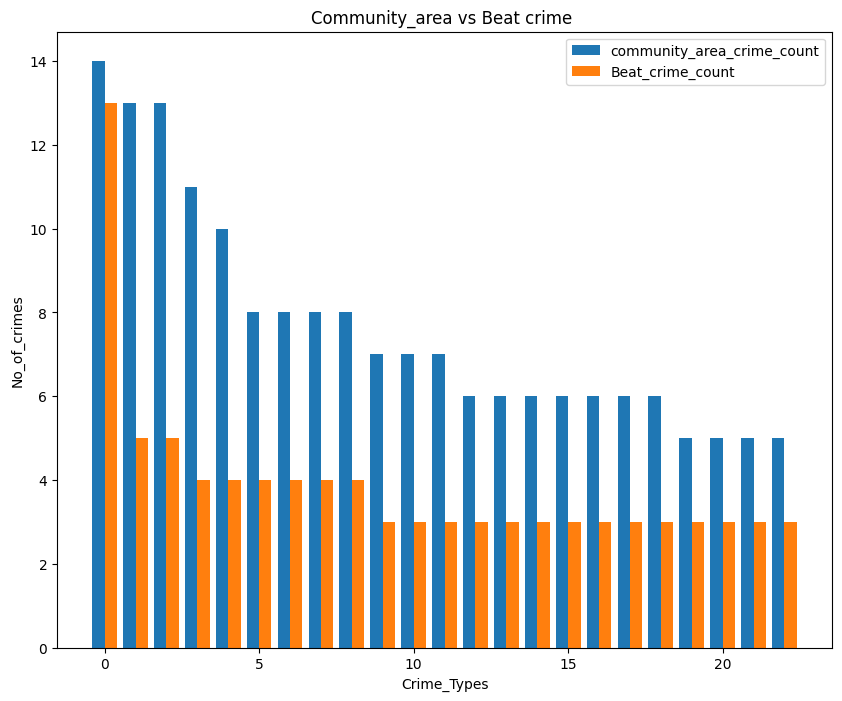

In [175]:
crime_type =  np.arange(23)                                                          
com_count = com_area_df['count'][:23].to_list()                         
beat_count = beat_df['count'][:23].to_list()
plt.figure(figsize=(10,8))
plt.bar(crime_type-0.2,com_count,width=0.4,label='community_area_crime_count')
plt.bar(crime_type+0.2,beat_count,width=0.4,label='Beat_crime_count')
plt.xlabel("Crime_Types")
plt.ylabel("No_of_crimes")
plt.title("Community_area vs Beat crime ")
plt.legend()
plt.show()

## Geospatial Analysis ##

In [176]:
df = df.dropna(subset=['Latitude', 'Longitude'])

## Heat Map to show the density of the crime incidents ##

In [177]:
map_center = [41.8337734,-88.0616153]
crime_map = folium.Map(location=map_center, zoom_start=8)

heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]

HeatMap(heat_data).add_to(crime_map)

for index, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=(f'crime_type:{row['Primary Type']} location :{row['Location Description']}')
    ).add_to(crime_map)

crime_map

## Repeat Crime Locations ##

In [178]:
crime_map_1= folium.Map(location=[41.8337734,-88.0616153],
                       zoom_start=12)

marker_cluster = MarkerCluster().add_to(crime_map)

for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,  
        color='red', 
        fill=True,
        fill_color='blue',  
        fill_opacity=0.6,  
        popup=(f'crime_type:{row['Primary Type']} location :{row['Location Description']}')  
    ).add_to(crime_map_1)    

crime_map_1

## District and Ward Analysis ##

In [179]:
data_7 = crime_grp['District'].value_counts().sort_values(ascending=False)
dist_df = pd.DataFrame(data_7).reset_index()
dist_df

Primary Type  District  count
0                 THEFT        14     21
1                 THEFT        19     20
2                 THEFT        12     20
3       CRIMINAL DAMAGE         2     19
4                 THEFT         1     17
..                  ...       ...    ...
259  DECEPTIVE PRACTICE        20      1
260  DECEPTIVE PRACTICE        19      1
261  DECEPTIVE PRACTICE         5      1
262   CRIMINAL TRESPASS        25      1
263   WEAPONS VIOLATION        18      1

[264 rows x 3 columns]

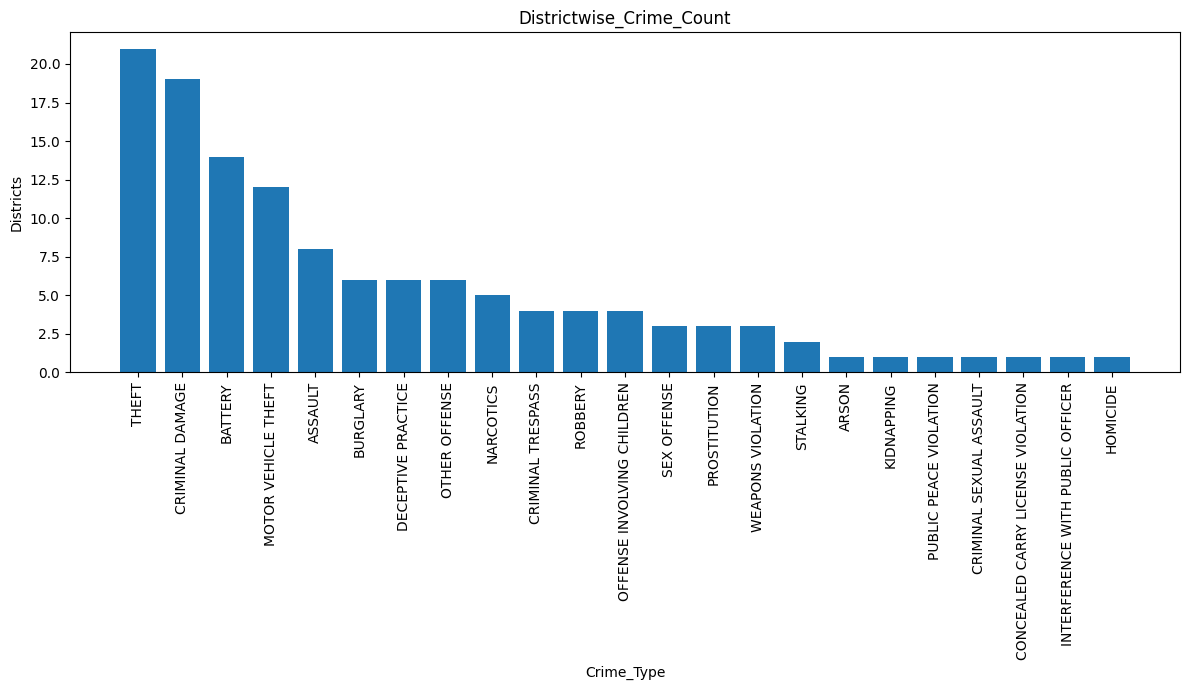

In [180]:
plt.figure(figsize=(12,7))
plt.bar(dist_df['Primary Type'],dist_df['count'])
plt.xticks(rotation=90)
plt.xlabel('Crime_Type')
plt.ylabel('Districts')
plt.title('Districtwise_Crime_Count')
plt.tight_layout()
plt.show()

In [181]:
data_8 = crime_grp['Ward'].value_counts().sort_values(ascending=False)
ward_df = pd.DataFrame(data_8).reset_index()
ward_df

Primary Type  Ward  count
0               CRIMINAL DAMAGE  4.00     18
1                       BATTERY 24.00     12
2                         THEFT  4.00     12
3                         THEFT  1.00     11
4                         THEFT 34.00     10
..                          ...   ...    ...
415  OFFENSE INVOLVING CHILDREN 33.00      1
416  OFFENSE INVOLVING CHILDREN 36.00      1
417  OFFENSE INVOLVING CHILDREN 37.00      1
418             CRIMINAL DAMAGE  5.00      1
419           WEAPONS VIOLATION 42.00      1

[420 rows x 3 columns]

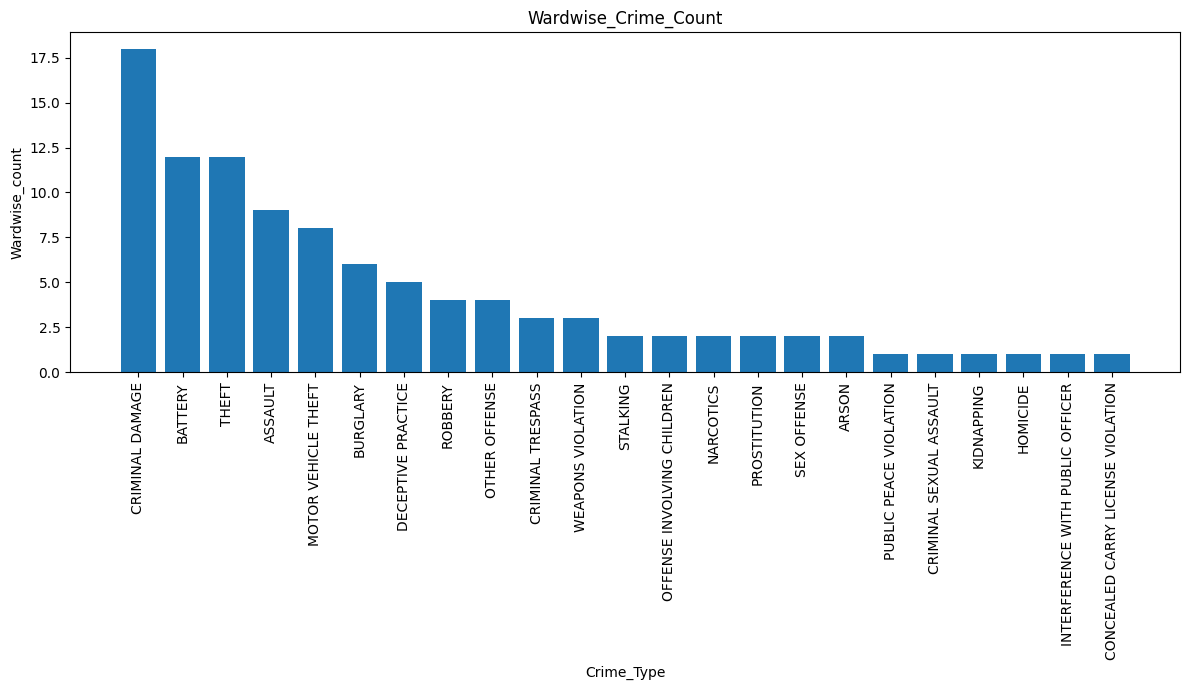

In [182]:
plt.figure(figsize=(12,7))
plt.bar(ward_df['Primary Type'],ward_df['count'])
plt.xticks(rotation=90)
plt.xlabel('Crime_Type')
plt.ylabel('Wardwise_count')
plt.title('Wardwise_Crime_Count')
plt.tight_layout()
plt.show()

## Arrest and Domestic incident analysis ##

In [183]:
data_3 = crime_grp[['Date','Location Description','Arrest']].value_counts(normalize=True).sort_values(ascending=False)
arrest_df = pd.DataFrame(data_3).reset_index()
arrest_df.rename(columns={'proportion':'Arrest_rate'},inplace=True)

In [184]:
arrest_df.drop(['Arrest'],axis=1,inplace=True)

In [185]:
arrest_df

Primary Type                Date  \
0    CONCEALED CARRY LICENSE VIOLATION 2023-09-06 07:40:00   
1                           KIDNAPPING 2023-04-19 11:30:00   
2     INTERFERENCE WITH PUBLIC OFFICER 2023-09-06 22:09:00   
3               PUBLIC PEACE VIOLATION 2023-09-07 11:44:00   
4               PUBLIC PEACE VIOLATION 2023-09-06 21:58:00   
..                                 ...                 ...   
926                              THEFT 2023-09-06 08:40:00   
927                              THEFT 2023-09-06 08:40:00   
928                              THEFT 2023-09-06 08:48:00   
929                              THEFT 2023-09-06 09:00:00   
930                              THEFT 2023-09-06 10:00:00   

                                Location Description  Arrest_rate  
0     AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA         1.00  
1                                             STREET         1.00  
2                                             STREET         1.00  
3                                          APARTMENT         0.33  
4                                          APARTMENT         0.33  
..                                               ...          ...  
926                                        APARTMENT         0.00  
927                                      GAS STATION         0.00  
928                                           STREET         0.00  
929            CHURCH / SYNAGOGUE / PLACE OF WORSHIP         0.00  
930  AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA         0.00  

[931 rows x 4 columns]

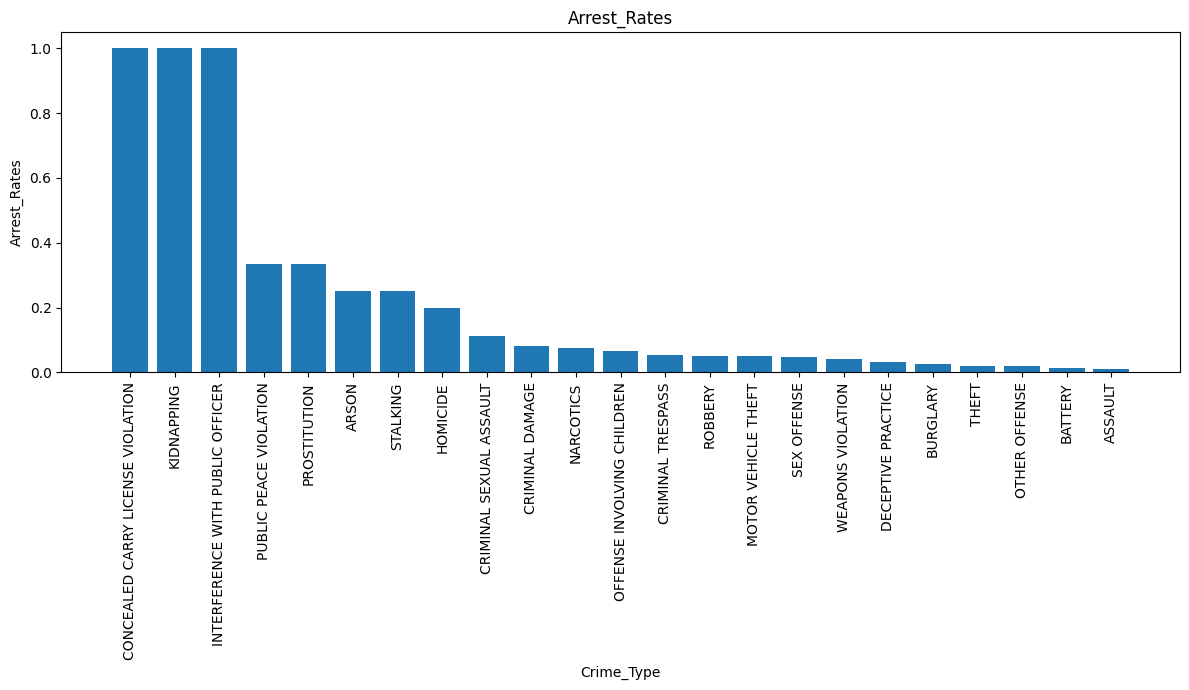

In [186]:
plt.figure(figsize=(12,7))
plt.bar(arrest_df['Primary Type'],arrest_df['Arrest_rate'])
plt.xticks(rotation=90)
plt.xlabel('Crime_Type')
plt.ylabel('Arrest_Rates')
plt.title('Arrest_Rates')
plt.tight_layout()
plt.show()

In [187]:
df[['Primary Type','Domestic','Description']]

Primary Type  Domestic  \
1               HOMICIDE     False   
2               HOMICIDE     False   
3               BURGLARY     False   
4                BATTERY     False   
6        CRIMINAL DAMAGE     False   
..                   ...       ...   
994                THEFT     False   
995  MOTOR VEHICLE THEFT     False   
996   DECEPTIVE PRACTICE     False   
997              BATTERY      True   
998      CRIMINAL DAMAGE     False   

                                           Description  
1                                  FIRST DEGREE MURDER  
2                                  FIRST DEGREE MURDER  
3                                       UNLAWFUL ENTRY  
4    AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...  
6                                           TO VEHICLE  
..                                                 ...  
994                                     $500 AND UNDER  
995                                         AUTOMOBILE  
996                           FRAUD OR CONFIDENCE GAME  
997                            DOMESTIC BATTERY SIMPLE  
998                                        TO PROPERTY  

[977 rows x 3 columns]

In [188]:
domestic_crimes = df['Domestic'] == True
data_5 = df.loc[domestic_crimes]['Primary Type']
domestic_crime_df = pd.DataFrame(data_5)
domestic_crime_df

Primary Type
16   OFFENSE INVOLVING CHILDREN
23                      ASSAULT
25      CRIMINAL SEXUAL ASSAULT
31                  SEX OFFENSE
32                OTHER OFFENSE
..                          ...
974         MOTOR VEHICLE THEFT
976                     BATTERY
986                     BATTERY
991                     BATTERY
997                     BATTERY

[199 rows x 1 columns]

In [189]:
domestic_crime_df.rename(columns={'Primary Type':'Domestic_crime'},inplace=True)
domestic_crime_df

Domestic_crime
16   OFFENSE INVOLVING CHILDREN
23                      ASSAULT
25      CRIMINAL SEXUAL ASSAULT
31                  SEX OFFENSE
32                OTHER OFFENSE
..                          ...
974         MOTOR VEHICLE THEFT
976                     BATTERY
986                     BATTERY
991                     BATTERY
997                     BATTERY

[199 rows x 1 columns]

In [190]:
non_dome_crime = df['Domestic'] == False
data_6 = df[non_dome_crime]['Primary Type']
non_dom_crime_df = pd.DataFrame(data_6)
non_dom_crime_df


Primary Type
1               HOMICIDE
2               HOMICIDE
3               BURGLARY
4                BATTERY
6        CRIMINAL DAMAGE
..                   ...
993    WEAPONS VIOLATION
994                THEFT
995  MOTOR VEHICLE THEFT
996   DECEPTIVE PRACTICE
998      CRIMINAL DAMAGE

[778 rows x 1 columns]

In [191]:
non_dom_crime_df.rename(columns={'Primary Type':'Non_domestic_crime'},inplace=True)

In [192]:
non_dom_crime_df

Non_domestic_crime
1               HOMICIDE
2               HOMICIDE
3               BURGLARY
4                BATTERY
6        CRIMINAL DAMAGE
..                   ...
993    WEAPONS VIOLATION
994                THEFT
995  MOTOR VEHICLE THEFT
996   DECEPTIVE PRACTICE
998      CRIMINAL DAMAGE

[778 rows x 1 columns]

In [193]:
crime_type_df = pd.concat([domestic_crime_df,non_dom_crime_df],axis=1)

In [194]:
crime_type_df.rename(columns={'Primary Type':'Domestic_crimes'})

Domestic_crime   Non_domestic_crime
16   OFFENSE INVOLVING CHILDREN                  NaN
23                      ASSAULT                  NaN
25      CRIMINAL SEXUAL ASSAULT                  NaN
31                  SEX OFFENSE                  NaN
32                OTHER OFFENSE                  NaN
..                          ...                  ...
993                         NaN    WEAPONS VIOLATION
994                         NaN                THEFT
995                         NaN  MOTOR VEHICLE THEFT
996                         NaN   DECEPTIVE PRACTICE
998                         NaN      CRIMINAL DAMAGE

[977 rows x 2 columns]

In [195]:
crime_type_df

Domestic_crime   Non_domestic_crime
16   OFFENSE INVOLVING CHILDREN                  NaN
23                      ASSAULT                  NaN
25      CRIMINAL SEXUAL ASSAULT                  NaN
31                  SEX OFFENSE                  NaN
32                OTHER OFFENSE                  NaN
..                          ...                  ...
993                         NaN    WEAPONS VIOLATION
994                         NaN                THEFT
995                         NaN  MOTOR VEHICLE THEFT
996                         NaN   DECEPTIVE PRACTICE
998                         NaN      CRIMINAL DAMAGE

[977 rows x 2 columns]

In [196]:
crime_type_df['Domestic_crime'].value_counts()

Domestic_crime
BATTERY                       86
ASSAULT                       30
OTHER OFFENSE                 23
CRIMINAL DAMAGE               16
OFFENSE INVOLVING CHILDREN    13
THEFT                          8
SEX OFFENSE                    6
CRIMINAL SEXUAL ASSAULT        4
MOTOR VEHICLE THEFT            4
BURGLARY                       3
ROBBERY                        2
DECEPTIVE PRACTICE             2
STALKING                       1
CRIMINAL TRESPASS              1
Name: count, dtype: int64

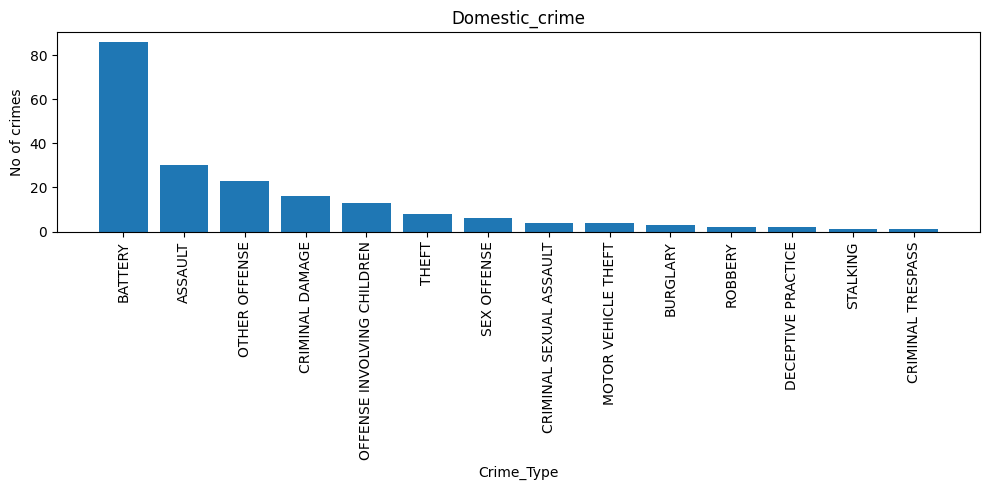

In [197]:
domestic_crime_counts = crime_type_df['Domestic_crime'].value_counts()

plt.figure(figsize=(10,5))
plt.bar(domestic_crime_counts.index.astype(str),crime_type_df['Domestic_crime'].value_counts())
plt.xticks(rotation=90)
plt.xlabel('Crime_Type')
plt.ylabel('No of crimes')
plt.title('Domestic_crime')
plt.tight_layout()
plt.show()

In [198]:
crime_type_df['Non_domestic_crime'].describe()

count       778
unique       23
top       THEFT
freq        195
Name: Non_domestic_crime, dtype: object

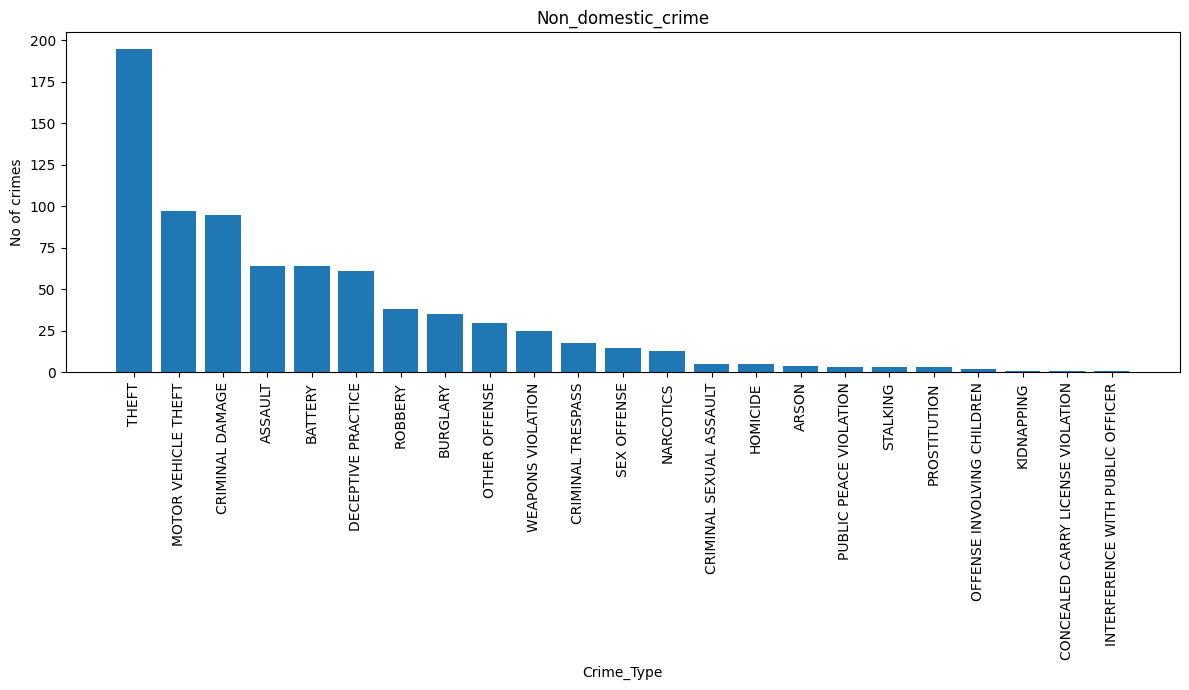

In [199]:
non_domestic_crime_counts = crime_type_df['Non_domestic_crime'].value_counts()

plt.figure(figsize=(12,7))
plt.bar(non_domestic_crime_counts.index.astype(str),crime_type_df['Non_domestic_crime'].value_counts())
plt.xticks(rotation=90)
plt.xlabel('Crime_Type')
plt.ylabel('No of crimes')
plt.title('Non_domestic_crime')
plt.tight_layout()
plt.show()

## Domestic vs. Non-Domestic Crimes : Which is high? ##

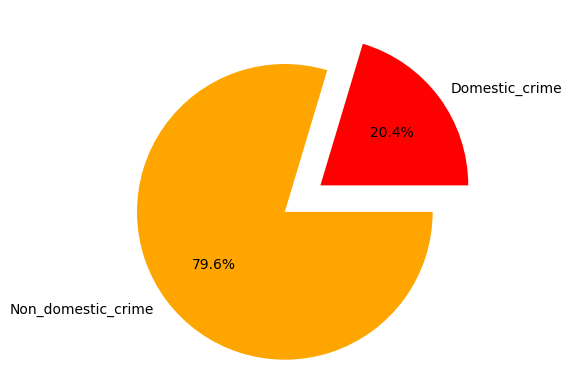

In [200]:
values = [crime_type_df['Domestic_crime'].value_counts().sum(),crime_type_df['Non_domestic_crime'].value_counts().sum()]
category = [crime_type_df.columns[0],crime_type_df.columns[1]]
color = ['red','orange']
explod = [0.1,0.2]
plt.pie(values,labels=category,colors = color,explode=explod,autopct="%1.1f%%")
plt.legend
plt.show()

## Crime Type Analysis ##

In [201]:
crm_type = crime_grp['Description'].value_counts().sort_values(ascending=False)
crm_type_df = pd.DataFrame(crm_type).reset_index()
crm_type_df

Primary Type                            Description  count
0                         THEFT                         $500 AND UNDER     73
1           MOTOR VEHICLE THEFT                             AUTOMOBILE     72
2                         THEFT                              OVER $500     69
3                       BATTERY                DOMESTIC BATTERY SIMPLE     69
4               CRIMINAL DAMAGE                             TO VEHICLE     67
..                          ...                                    ...    ...
116  OFFENSE INVOLVING CHILDREN                        CHILD ABDUCTION      1
117  OFFENSE INVOLVING CHILDREN                      CHILD PORNOGRAPHY      1
118               OTHER OFFENSE     GUN OFFENDER - ANNUAL REGISTRATION      1
119               OTHER OFFENSE                      LICENSE VIOLATION      1
120           WEAPONS VIOLATION  UNLAWFUL USE - OTHER DANGEROUS WEAPON      1

[121 rows x 3 columns]

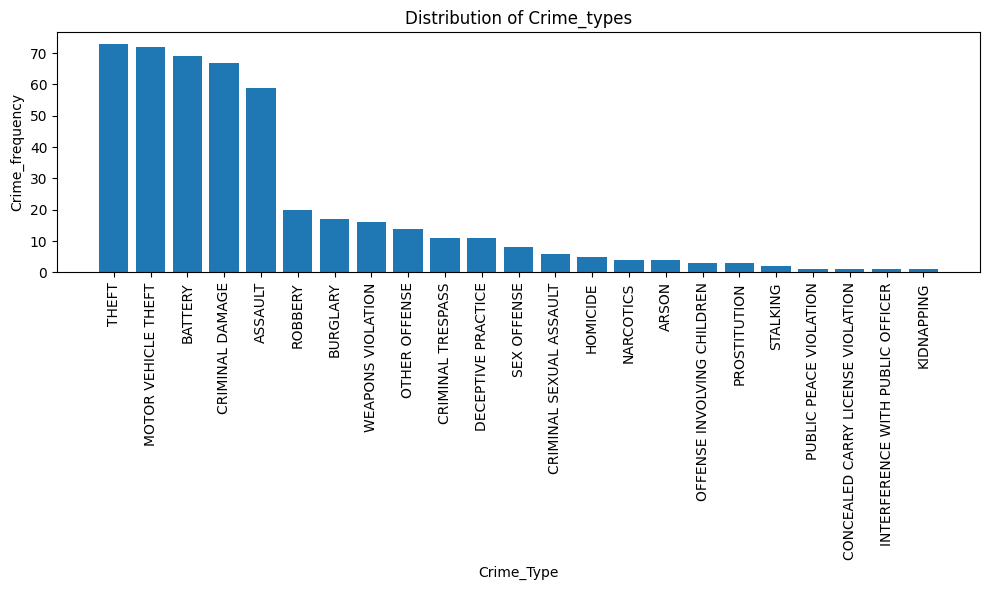

In [202]:
plt.figure(figsize=(10,6))
plt.bar(crm_type_df['Primary Type'],crm_type_df['count'])
plt.xticks(rotation=90)
plt.xlabel('Crime_Type')
plt.ylabel('Crime_frequency')
plt.title('Distribution of Crime_types')
plt.tight_layout()
plt.show()

## Severity Analysis ##

In [203]:
severe_crimes = ['HOMICIDE', 'ASSAULT', 'BATTERY', 'ROBBERY', 'CRIM SEXUAL ASSAULT']
less_severe_crimes = ['THEFT', 'FRAUD', 'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'PUBLIC PEACE VIOLATION']

In [204]:
df['severity'] = df['Primary Type'].apply(lambda x: 'severe' if x in severe_crimes else 'less_severe' if x in less_severe_crimes else 'other')

In [205]:
df.head(2)

ID Case Number                Date                  Block IUCR  \
1  25953    JE240540 2021-05-24 15:06:00    020XX N LARAMIE AVE  110   
2  26038    JE279849 2021-06-26 09:24:00  062XX N MC CORMICK RD  110   

  Primary Type          Description Location Description  Arrest  Domestic  \
1     HOMICIDE  FIRST DEGREE MURDER               STREET    True     False   
2     HOMICIDE  FIRST DEGREE MURDER          PARKING LOT    True     False   

   ...  Year          Updated On  Latitude  Longitude  \
1  ...  2021 2023-11-18 15:39:00     41.92     -87.76   
2  ...  2021 2023-11-18 15:39:00     42.00     -87.71   

                        Location  month_name       day  hour  year  severity  
1  (41.917838056, -87.755968972)         May    Monday    15  2021    severe  
2  (41.995219444, -87.713354912)        June  Saturday     9  2021    severe  

[2 rows x 27 columns]

In [206]:
crime_grp = df.groupby('Primary Type')

In [207]:
data_11 = crime_grp['severity'].value_counts().sort_values(ascending=False)
severe_df = pd.DataFrame(data_11).reset_index()
severe_df


Primary Type     severity  count
0                               THEFT  less_severe    203
1                             BATTERY       severe    150
2                     CRIMINAL DAMAGE  less_severe    111
3                 MOTOR VEHICLE THEFT        other    101
4                             ASSAULT       severe     94
5                  DECEPTIVE PRACTICE  less_severe     63
6                       OTHER OFFENSE        other     53
7                             ROBBERY       severe     40
8                            BURGLARY        other     38
9                   WEAPONS VIOLATION        other     25
10                        SEX OFFENSE        other     21
11                  CRIMINAL TRESPASS        other     19
12         OFFENSE INVOLVING CHILDREN        other     15
13                          NARCOTICS        other     13
14            CRIMINAL SEXUAL ASSAULT        other      9
15                           HOMICIDE       severe      5
16                           STALKING        other      4
17                              ARSON        other      4
18             PUBLIC PEACE VIOLATION  less_severe      3
19                       PROSTITUTION        other      3
20   INTERFERENCE WITH PUBLIC OFFICER        other      1
21  CONCEALED CARRY LICENSE VIOLATION        other      1
22                         KIDNAPPING        other      1

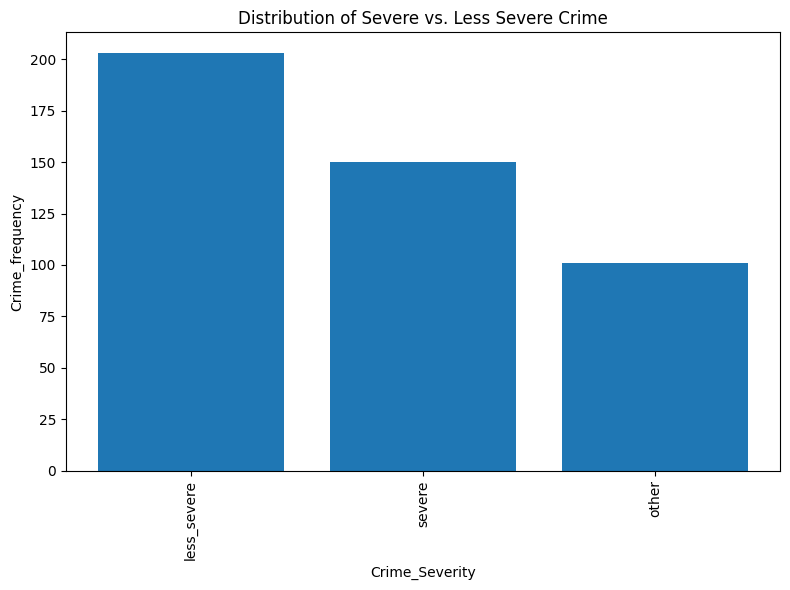

In [208]:
plt.figure(figsize=(8,6))
plt.bar(severe_df['severity'],severe_df['count'])
plt.xticks(rotation=90)
plt.xlabel('Crime_Severity')
plt.ylabel('Crime_frequency')
plt.title('Distribution of Severe vs. Less Severe Crime')
plt.tight_layout()
plt.show()

## Seasonal and Weather Impact ##

In [209]:
summer_months = ['June','July','August']
spring = ['March','April','May']
autumn = ['September','October','November']
winter = ['December','January','February']

In [210]:
df['summer'] = df['month_name'].apply(lambda x:  'summer' if x in summer_months else 'not summer' )

In [211]:
df['summer'].value_counts()

summer
not summer    865
summer        112
Name: count, dtype: int64

In [212]:
df['autumn'] = df['month_name'].apply(lambda x: 'autumn' if x in autumn else 'not autumn')

In [213]:
df['spring'] = df['month_name'].apply(lambda x: 'spring' if x in spring else 'not spring')
df['winter'] = df['month_name'].apply(lambda x: 'winter' if x in winter else 'not winter')

In [214]:
df['autumn'].value_counts()

autumn
autumn        840
not autumn    137
Name: count, dtype: int64

In [215]:
df['spring'].value_counts()

spring
not spring    958
spring         19
Name: count, dtype: int64

In [216]:
df['winter'].value_counts()

winter
not winter    971
winter          6
Name: count, dtype: int64

In [217]:
df[['summer','autumn','winter','spring']].value_counts()

summer      autumn      winter      spring    
not summer  autumn      not winter  not spring    840
summer      not autumn  not winter  not spring    112
not summer  not autumn  not winter  spring         19
                        winter      not spring      6
Name: count, dtype: int64

In [218]:
df[['summer','autumn','winter','spring']].value_counts().index.names

FrozenList(['summer', 'autumn', 'winter', 'spring'])

In [219]:
df[['summer','autumn','winter','spring']].value_counts().values

array([840, 112,  19,   6], dtype=int64)

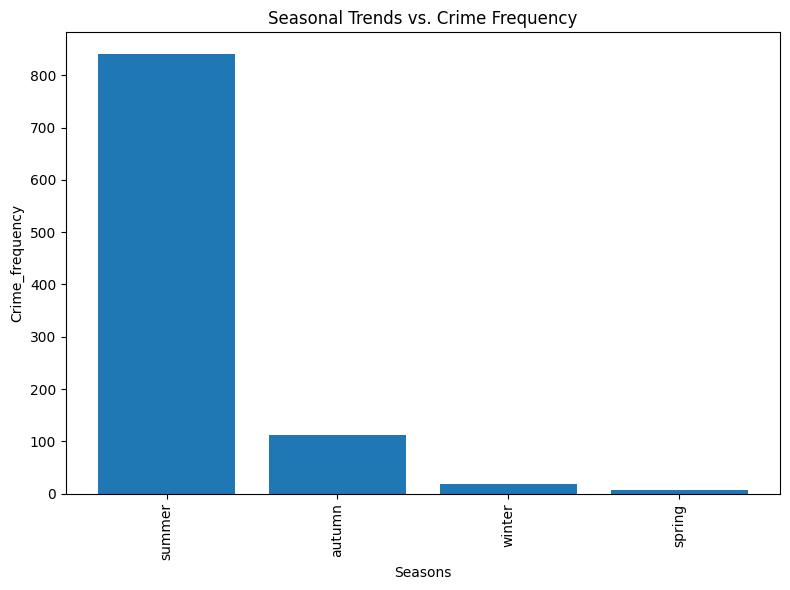

In [220]:
plt.figure(figsize=(8,6))
plt.bar(df[['summer','autumn','winter','spring']].value_counts().index.names,df[['summer','autumn','winter','spring']].value_counts().values)
plt.xticks(rotation=90)
plt.xlabel('Seasons')
plt.ylabel('Crime_frequency')
plt.title('Seasonal Trends vs. Crime Frequency')
plt.tight_layout()
plt.show()

In [221]:
df_1 = df[['Primary Type','Description','Location','Domestic','District']]

In [222]:
df_1

Primary Type                                        Description  \
1               HOMICIDE                                FIRST DEGREE MURDER   
2               HOMICIDE                                FIRST DEGREE MURDER   
3               BURGLARY                                     UNLAWFUL ENTRY   
4                BATTERY  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
6        CRIMINAL DAMAGE                                         TO VEHICLE   
..                   ...                                                ...   
994                THEFT                                     $500 AND UNDER   
995  MOTOR VEHICLE THEFT                                         AUTOMOBILE   
996   DECEPTIVE PRACTICE                           FRAUD OR CONFIDENCE GAME   
997              BATTERY                            DOMESTIC BATTERY SIMPLE   
998      CRIMINAL DAMAGE                                        TO PROPERTY   

                          Location  Domestic  District  
1    (41.917838056, -87.755968972)     False        25  
2    (41.995219444, -87.713354912)     False        17  
3    (41.952345086, -87.677975059)     False        19  
4    (41.737750767, -87.604855911)     False         6  
6    (41.886018055, -87.633937881)     False         1  
..                             ...       ...       ...  
994  (41.865336883, -87.625785555)     False         1  
995  (41.765037977, -87.607989236)     False         3  
996  (41.763396621, -87.643595327)     False         7  
997  (41.744109895, -87.546671547)      True         4  
998    (41.7727202, -87.586295567)     False         3  

[977 rows x 5 columns]

## Label Encoding ##

In [223]:
label_encoder_primary_type = LabelEncoder()

In [224]:
df_1['Primary Type'] = label_encoder_primary_type.fit_transform(df_1['Primary Type'])

In [225]:
def lab_encod(col):
    label_encoder_primary_type = LabelEncoder()
    df_1['Primary Type'] = label_encoder_primary_type.fit_transform(df_1['Primary Type'])
    return df_1['Primary Type']

In [226]:
lab_encod(df_1['Primary Type'])

1       9
2       9
3       3
4       2
6       5
       ..
994    21
995    12
996     8
997     2
998     5
Name: Primary Type, Length: 977, dtype: int64

In [227]:
df_1

Primary Type                                        Description  \
1               9                                FIRST DEGREE MURDER   
2               9                                FIRST DEGREE MURDER   
3               3                                     UNLAWFUL ENTRY   
4               2  AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...   
6               5                                         TO VEHICLE   
..            ...                                                ...   
994            21                                     $500 AND UNDER   
995            12                                         AUTOMOBILE   
996             8                           FRAUD OR CONFIDENCE GAME   
997             2                            DOMESTIC BATTERY SIMPLE   
998             5                                        TO PROPERTY   

                          Location  Domestic  District  
1    (41.917838056, -87.755968972)     False        25  
2    (41.995219444, -87.713354912)     False        17  
3    (41.952345086, -87.677975059)     False        19  
4    (41.737750767, -87.604855911)     False         6  
6    (41.886018055, -87.633937881)     False         1  
..                             ...       ...       ...  
994  (41.865336883, -87.625785555)     False         1  
995  (41.765037977, -87.607989236)     False         3  
996  (41.763396621, -87.643595327)     False         7  
997  (41.744109895, -87.546671547)      True         4  
998    (41.7727202, -87.586295567)     False         3  

[977 rows x 5 columns]

In [228]:
for col in df_1.columns.drop(['Primary Type']):
    print(col)

Description
Location
Domestic
District


In [229]:
cols_1 = df_1.columns.drop(['Primary Type'])
cols_1

Index(['Description', 'Location', 'Domestic', 'District'], dtype='object')

In [230]:
def label_encode(col):
    labeled_encoder = LabelEncoder()
    for col in df_1.columns.drop(['Primary Type']):
        df_1[col] = labeled_encoder.fit_transform(df_1[col])    
    return df_1[col]


In [231]:
label_encode(cols_1)

1      21
2      15
3      17
4       5
6       0
       ..
994     0
995     2
996     6
997     3
998     2
Name: District, Length: 977, dtype: int64

In [232]:
df_1

Primary Type  Description  Location  Domestic  District
1               9           50       702         0        21
2               9           50       895         0        15
3               3          105       797         0        17
4               2           15       113         0         5
6               5          104       556         0         0
..            ...          ...       ...       ...       ...
994            21            0       452         0         0
995            12           28       224         0         2
996             8           53       215         0         6
997             2           43       124         1         3
998             5          100       252         0         2

[977 rows x 5 columns]

In [233]:
for col in cols_1:
    mx = MinMaxScaler()
    df_1[col] = mx.fit_transform(df_1[[col]])

In [234]:
df_1

Primary Type  Description  Location  Domestic  District
1               9         0.44      0.75      0.00      1.00
2               9         0.44      0.96      0.00      0.71
3               3         0.93      0.86      0.00      0.81
4               2         0.13      0.12      0.00      0.24
6               5         0.92      0.60      0.00      0.00
..            ...          ...       ...       ...       ...
994            21         0.00      0.49      0.00      0.00
995            12         0.25      0.24      0.00      0.10
996             8         0.47      0.23      0.00      0.29
997             2         0.38      0.13      1.00      0.14
998             5         0.88      0.27      0.00      0.10

[977 rows x 5 columns]

## Imbalanced data ##

In [235]:
df_1['Primary Type'].value_counts().sort_values(ascending=False).head(5)

Primary Type
21    203
2     150
5     111
12    101
1      94
Name: count, dtype: int64

In [236]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

models = LazyClassifier()

models,predictions = models.fit(x_train,x_test,y_train,y_test)

models

 90%|████████▉ | 26/29 [00:01<00:00, 22.17it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 344
[LightGBM] [Info] Number of data points in the train set: 781, number of used features: 4
[LightGBM] [Info] Start training from score -5.967428
[LightGBM] [Info] Start training from score -2.316770
[LightGBM] [Info] Start training from score -1.840294
[LightGBM] [Info] Start training from score -3.194839
[LightGBM] [Info] Start training from score -6.660575
[LightGBM] [Info] Start training from score -2.149716
[LightGBM] [Info] Start training from score -4.714665
[LightGBM] [Info] Start training from score -3.827362
[LightGBM] [Info] Start training from score -2.789374
[LightGBM] [Info] Start training from score -5.051137
[LightGBM] [Info] Start training from score -6.660575
[LightGBM] [Info] Start training from score -6.660575
[Li

100%|██████████| 29/29 [00:03<00:00,  9.16it/s]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                        
DecisionTreeClassifier           0.85               0.67    None      0.85   
XGBClassifier                    0.84               0.65    None      0.83   
BaggingClassifier                0.83               0.65    None      0.82   
LGBMClassifier                   0.79               0.54    None      0.77   
RandomForestClassifier           0.71               0.49    None      0.69   
ExtraTreesClassifier             0.68               0.47    None      0.67   
ExtraTreeClassifier              0.63               0.47    None      0.64   
LabelPropagation                 0.49               0.24    None      0.47   
LabelSpreading                   0.49               0.24    None      0.46   
AdaBoostClassifier               0.37               0.22    None      0.30   
KNeighborsClassifier             0.47               0.22    None      0.43   
SVC                              0.52               0.21    None      0.43   
GaussianNB                       0.21               0.18    None      0.19   
NearestCentroid                  0.07               0.18    None      0.06   
LinearDiscriminantAnalysis       0.37               0.15    None      0.28   
LogisticRegression               0.39               0.14    None      0.28   
CalibratedClassifierCV           0.39               0.14    None      0.28   
LinearSVC                        0.37               0.13    None      0.25   
SGDClassifier                    0.19               0.12    None      0.17   
BernoulliNB                      0.33               0.12    None      0.24   
RidgeClassifierCV                0.34               0.12    None      0.22   
RidgeClassifier                  0.33               0.12    None      0.21   
PassiveAggressiveClassifier      0.22               0.11    None      0.17   
Perceptron                       0.29               0.10    None      0.20   
DummyClassifier                  0.21               0.05    None      0.08   

                             Time Taken  
Model                                    
DecisionTreeClassifier             0.01  
XGBClassifier                      0.67  
BaggingClassifier                  0.05  
LGBMClassifier                     1.20  
RandomForestClassifier             0.18  
ExtraTreesClassifier               0.16  
ExtraTreeClassifier                0.02  
LabelPropagation                   0.04  
LabelSpreading                     0.04  
AdaBoostClassifier                 0.17  
KNeighborsClassifier               0.03  
SVC                                0.12  
GaussianNB                         0.00  
NearestCentroid                    0.01  
LinearDiscriminantAnalysis         0.02  
LogisticRegression                 0.03  
CalibratedClassifierCV             0.17  
LinearSVC                          0.09  
SGDClassifier                      0.03  
BernoulliNB                        0.02  
RidgeClassifierCV                  0.00  
RidgeClassifier                    0.02  
PassiveAggressiveClassifier        0.03  
Perceptron                         0.02  
DummyClassifier                    0.00

In [237]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

model = LogisticRegression()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f'Train_Accuracy : {accuracy_score(y_train,train_pred)}')
print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
print(f'Recall_score : {recall_score(y_train,train_pred,average='weighted')}')
print(f'F1_score : {f1_score(y_train,train_pred,average='weighted')}')
print()
print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
print(f'Test F1_score : {f1_score(y_test,test_pred,average='weighted')}')

Train_Accuracy : 0.3879641485275288
Train Precision : 0.23798422574141676
Recall_score : 0.3879641485275288
F1_score : 0.26575262376033126

Test Accuracy : 0.39285714285714285
Test Precision : 0.2511299097069214
Test Recall : 0.39285714285714285
Test F1_score : 0.2773408170917411


## Imbalanced data ##

In [238]:
y_train.value_counts().head(5)

Primary Type
21    165
2     112
5      89
12     79
1      76
Name: count, dtype: int64

## Imbalanced data in percentage ##

In [239]:
y_train.value_counts(normalize=True).head(5)

Primary Type
21   0.21
2    0.14
5    0.11
12   0.10
1    0.10
Name: proportion, dtype: float64

In [240]:
X = df_1.drop(['Primary Type'],axis=1)
y =df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = LogisticRegression()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
print()
print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')

Train Accuracy : 0.3220883534136546
Train Precision : 0.2302093612460257
Train Recall : 0.3220883534136546
Train F1 Score : 0.23555372941986816

Test Accuracy : 0.3169164882226981
Test Precision : 0.2458156751773358
Test Recall : 0.3169164882226981
Test F1_Score: 0.2388338384191944


## Balanced data ##

In [241]:
y_train.value_counts().head(5)

Primary Type
5     174
8     171
10    169
4     169
17    168
Name: count, dtype: int64

In [242]:
y_train.value_counts(normalize=True).head(5)

Primary Type
5    0.05
8    0.05
10   0.05
4    0.05
17   0.04
Name: proportion, dtype: float64

## Findout the best ML Models ##

In [243]:
X = df_1.drop(['Primary Type'],axis=1)
y =df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

models = [LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),
         AdaBoostClassifier(),GradientBoostingClassifier()]

for model in models:

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{type(model).__name__}*********")
    print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
    print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
    print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
    print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
    print()
    print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
    print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
    print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
    print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
    print()

********LogisticRegression*********
Train Accuracy : 0.3188755020080321
Train Precision : 0.2712578708107407
Train Recall : 0.3188755020080321
Train F1 Score : 0.24929457378821887

Test Accuracy : 0.32548179871520344
Test Precision : 0.31525427277291246
Test Recall : 0.32548179871520344
Test F1_Score: 0.2550608581015602

********KNeighborsClassifier*********
Train Accuracy : 0.9314591700133869
Train Precision : 0.9326256381236586
Train Recall : 0.9314591700133869
Train F1 Score : 0.9294587823095593

Test Accuracy : 0.8897216274089935
Test Precision : 0.8903765121565239
Test Recall : 0.8897216274089935
Test F1_Score: 0.8857914609853575

********SVC*********
Train Accuracy : 0.5882195448460509
Train Precision : 0.5894173693984733
Train Recall : 0.5882195448460509
Train F1 Score : 0.5443133214447586

Test Accuracy : 0.5599571734475375
Test Precision : 0.5871081519168789
Test Recall : 0.5599571734475375
Test F1_Score: 0.5098103661786189

********DecisionTreeClassifier*********
Train Accura

In [244]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

model = GradientBoostingClassifier()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f'Train_Accuracy : {accuracy_score(y_train,train_pred)}')
print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
print(f'Recall_score : {recall_score(y_train,train_pred,average='weighted')}')
print(f'F1_score : {f1_score(y_train,train_pred,average='weighted')}')
print()
print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
print(f'Test F1_score : {f1_score(y_test,test_pred,average='weighted')}')

Train_Accuracy : 0.9974391805377721
Train Precision : 0.9974801536491676
Recall_score : 0.9974391805377721
F1_score : 0.9974336988951558

Test Accuracy : 0.8367346938775511
Test Precision : 0.8403018451890631
Test Recall : 0.8367346938775511
Test F1_score : 0.8216706339104117


In [245]:
y_train.value_counts().head(5)

Primary Type
21    160
2     123
5      95
1      82
12     80
Name: count, dtype: int64

In [246]:
y_train.value_counts(normalize=True).head(5)

Primary Type
21   0.20
2    0.16
5    0.12
1    0.10
12   0.10
Name: proportion, dtype: float64

In [247]:
X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

ros = RandomOverSampler()

X,y=ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

model = GradientBoostingClassifier()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f'Train_Accuracy : {accuracy_score(y_train,train_pred)}')
print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
print(f'Recall_score : {recall_score(y_train,train_pred,average='weighted')}')
print(f'F1_score : {f1_score(y_train,train_pred,average='weighted')}')
print()
print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
print(f'Test F1_score : {f1_score(y_test,test_pred,average='weighted')}')

Train_Accuracy : 0.9983935742971888
Train Precision : 0.9984008799932957
Recall_score : 0.9983935742971888
F1_score : 0.9983939983160395

Test Accuracy : 0.9903640256959315
Test Precision : 0.9903863311920056
Test Recall : 0.9903640256959315
Test F1_score : 0.9903121353736268


In [248]:
y_train.value_counts().head(5)

Primary Type
6     177
2     171
16    167
10    166
15    166
Name: count, dtype: int64

In [249]:
y_train.value_counts(normalize=True).head(5)

Primary Type
6    0.05
2    0.05
16   0.04
10   0.04
15   0.04
Name: proportion, dtype: float64

## Feature Importance ##

Text(0, 0.5, 'Feature Importance Score')

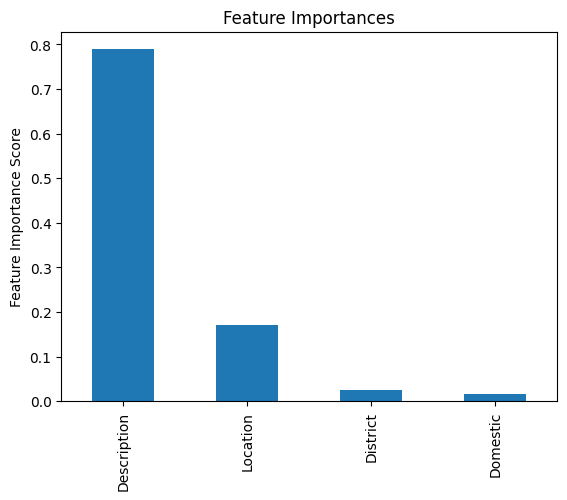

In [250]:
feat_imp = pd.Series(model.feature_importances_,x_train.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

## Hyperparameters tuning of ML Model ##

In [251]:
'''X = df_1.drop(['Primary Type'],axis=1)
y = df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = GradientBoostingClassifier()

params = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[1, 2, 4, 8, 16, 32, 64, 100]
    }

cv = GridSearchCV(model,params)
cv.fit(x_train,y_train)
cv.best_params_'''

'X = df_1.drop([\'Primary Type\'],axis=1)\ny = df_1[\'Primary Type\']\n\nros = RandomOverSampler()\n\nX,y = ros.fit_resample(X,y)\n\nx_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)\n\nmodel = GradientBoostingClassifier()\n\nparams = {\n    "loss":["deviance"],\n    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],\n    "min_samples_split": np.linspace(0.1, 0.5, 12),\n    "min_samples_leaf": np.linspace(0.1, 0.5, 12),\n    "max_depth":[3,5,8],\n    "max_features":["log2","sqrt"],\n    "criterion": ["friedman_mse",  "mae"],\n    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],\n    "n_estimators":[1, 2, 4, 8, 16, 32, 64, 100]\n    }\n\ncv = GridSearchCV(model,params)\ncv.fit(x_train,y_train)\ncv.best_params_'

In [252]:
'''X = df_1.drop(['Primary Type'],axis=1)
y =df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

loss = {'log_loss','exponential'}

for los in loss:

    model = GradientBoostingClassifier(loss=los)

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{(los)}*********")
    print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
    print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
    print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
    print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
    print()
    print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
    print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
    print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
    print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
    print()'''
    

'X = df_1.drop([\'Primary Type\'],axis=1)\ny =df_1[\'Primary Type\']\n\nros = RandomOverSampler()\n\nX,y = ros.fit_resample(X,y)\n\nx_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)\n\nloss = {\'log_loss\',\'exponential\'}\n\nfor los in loss:\n\n    model = GradientBoostingClassifier(loss=los)\n\n    model.fit(x_train,y_train)\n\n    train_pred = model.predict(x_train)\n    test_pred = model.predict(x_test)\n\n    print(f"********{(los)}*********")\n    print(f\'Train Accuracy : {accuracy_score(y_train,train_pred)}\')\n    print(f\'Train Precision : {precision_score(y_train,train_pred,average=\'weighted\')}\')\n    print(f\'Train Recall : {recall_score(y_train,train_pred,average=\'weighted\')}\')\n    print(f\'Train F1 Score : {f1_score(y_train,train_pred,average=\'weighted\')}\')\n    print()\n    print(f\'Test Accuracy : {accuracy_score(y_test,test_pred)}\')\n    print(f\'Test Precision : {precision_score(y_test,test_pred,average=\'weighted\')}\')\n    print(f\'Test

In [253]:
X = df_1.drop(['Primary Type'],axis=1)
y =df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

learning_rate = [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2]

for learn in learning_rate:

    model = GradientBoostingClassifier(loss='log_loss',learning_rate=learn)

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{(learn)}*********")
    print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
    print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
    print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
    print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
    print()
    print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
    print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
    print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
    print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
    print()
    

********0.01*********
Train Accuracy : 0.9421686746987952
Train Precision : 0.9532566618299924
Train Recall : 0.9421686746987952
Train F1 Score : 0.9417225566891029

Test Accuracy : 0.9282655246252677
Test Precision : 0.9435803989370115
Test Recall : 0.9282655246252677
Test F1_Score: 0.9260806272398717

********0.025*********
Train Accuracy : 0.9756358768406961
Train Precision : 0.979255891097196
Train Recall : 0.9756358768406961
Train F1 Score : 0.9752838109697007

Test Accuracy : 0.9657387580299786
Test Precision : 0.9733458793214569
Test Recall : 0.9657387580299786
Test F1_Score: 0.9642619119703896

********0.05*********
Train Accuracy : 0.9887550200803212
Train Precision : 0.9908985635794713
Train Recall : 0.9887550200803212
Train F1 Score : 0.9885608133538805

Test Accuracy : 0.9807280513918629
Test Precision : 0.9854246564333012
Test Recall : 0.9807280513918629
Test F1_Score: 0.9799285004486784

********0.075*********
Train Accuracy : 0.9941097724230255
Train Precision : 0.994484

In [254]:
X = df_1.drop(['Primary Type'],axis=1)
y =df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

min_samp_split = np.linspace(0.1, 0.5, 5)

for sample in min_samp_split:

    model = GradientBoostingClassifier(loss='log_loss',learning_rate=0.1,min_samples_split=sample)

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{(sample)}*********")
    print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
    print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
    print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
    print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
    print()
    print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
    print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
    print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
    print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
    print()
    

********0.1*********
Train Accuracy : 0.992235609103079
Train Precision : 0.9927015469284546
Train Recall : 0.992235609103079
Train F1 Score : 0.9921996690114937

Test Accuracy : 0.9882226980728052
Test Precision : 0.9902620978271673
Test Recall : 0.9882226980728052
Test F1_Score: 0.9882022474231148

********0.2*********
Train Accuracy : 0.9900937081659973
Train Precision : 0.9909797521080155
Train Recall : 0.9900937081659973
Train F1 Score : 0.9900115152835564

Test Accuracy : 0.9828693790149893
Test Precision : 0.9875357928702646
Test Recall : 0.9828693790149893
Test F1_Score: 0.9826209746712958

********0.30000000000000004*********
Train Accuracy : 0.9882195448460509
Train Precision : 0.9894851345703028
Train Recall : 0.9882195448460509
Train F1 Score : 0.9880756013364206

Test Accuracy : 0.9828693790149893
Test Precision : 0.9871806807846283
Test Recall : 0.9828693790149893
Test F1_Score: 0.9825898583928562

********0.4*********
Train Accuracy : 0.9892904953145917
Train Precision :

In [255]:
X = df_1.drop(['Primary Type'],axis=1)
y =df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

min_samp_leaf= np.linspace(0.1, 0.5, 5)

for samp in min_samp_leaf:

    model = GradientBoostingClassifier(loss='log_loss',learning_rate=0.1,min_samples_split=0.28,min_samples_leaf=samp)

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{(samp)}*********")
    print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
    print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
    print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
    print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
    print()
    print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
    print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
    print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
    print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
    print()
    

********0.1*********
Train Accuracy : 0.9464524765729585
Train Precision : 0.9493175757183725
Train Recall : 0.9464524765729585
Train F1 Score : 0.9456703996955943

Test Accuracy : 0.923982869379015
Test Precision : 0.926599515969009
Test Recall : 0.923982869379015
Test F1_Score: 0.9229000019775913

********0.2*********
Train Accuracy : 0.7983935742971887
Train Precision : 0.8462566828702333
Train Recall : 0.7983935742971887
Train F1 Score : 0.803439081023773

Test Accuracy : 0.7997858672376874
Test Precision : 0.8395087118790721
Test Recall : 0.7997858672376874
Test F1_Score: 0.8028063860412706

********0.30000000000000004*********
Train Accuracy : 0.6005354752342704
Train Precision : 0.6410381760797607
Train Recall : 0.6005354752342704
Train F1 Score : 0.5934406999305574

Test Accuracy : 0.5835117773019272
Test Precision : 0.6340372983004134
Test Recall : 0.5835117773019272
Test F1_Score: 0.5806492548411981

********0.4*********
Train Accuracy : 0.4072289156626506
Train Precision : 0

In [256]:
X = df_1.drop(['Primary Type'],axis=1)
y =df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

max_depth_list = [3,5,8]

for mx in max_depth_list:

    model = GradientBoostingClassifier(loss='log_loss',learning_rate=0.1,min_samples_split=0.28,min_samples_leaf=0.1,max_depth = mx)

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{(mx)}*********")
    print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
    print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
    print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
    print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
    print()
    print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
    print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
    print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
    print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
    print()
    

********3*********
Train Accuracy : 0.9464524765729585
Train Precision : 0.9495350385749282
Train Recall : 0.9464524765729585
Train F1 Score : 0.9460611854691423

Test Accuracy : 0.9389721627408993
Test Precision : 0.9427728020010921
Test Recall : 0.9389721627408993
Test F1_Score: 0.9383519361537843

********5*********
Train Accuracy : 0.951004016064257
Train Precision : 0.9525275129289755
Train Recall : 0.951004016064257
Train F1 Score : 0.950352015389097

Test Accuracy : 0.9400428265524625
Test Precision : 0.9423984749056669
Test Recall : 0.9400428265524625
Test F1_Score: 0.9389330773992544

********8*********
Train Accuracy : 0.9512717536813923
Train Precision : 0.9532000311157411
Train Recall : 0.9512717536813923
Train F1 Score : 0.9507549150110332

Test Accuracy : 0.9400428265524625
Test Precision : 0.943754834759578
Test Recall : 0.9400428265524625
Test F1_Score: 0.938878760301702



In [257]:
X = df_1.drop(['Primary Type'],axis=1)
y =df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

max_features =["log2","sqrt"]

for max in max_features:

    model = GradientBoostingClassifier(loss='log_loss',learning_rate=0.1,min_samples_split=0.28,min_samples_leaf=0.1,max_depth =5,max_features=max)

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{(max)}*********")
    print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
    print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
    print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
    print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
    print()
    print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
    print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
    print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
    print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
    print()
    

********log2*********
Train Accuracy : 0.9491298527443106
Train Precision : 0.9508013199730877
Train Recall : 0.9491298527443106
Train F1 Score : 0.948374889153298

Test Accuracy : 0.9282655246252677
Test Precision : 0.9325493110282195
Test Recall : 0.9282655246252677
Test F1_Score: 0.9277210100850649

********sqrt*********
Train Accuracy : 0.9491298527443106
Train Precision : 0.9506869568820044
Train Recall : 0.9491298527443106
Train F1 Score : 0.9483852873496224

Test Accuracy : 0.930406852248394
Test Precision : 0.9358521125155449
Test Recall : 0.930406852248394
Test F1_Score: 0.9298465703881508



In [258]:
X = df_1.drop(['Primary Type'],axis=1)
y =df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

criterion = ['friedman_mse', 'squared_error']

for crit in criterion:

    model = GradientBoostingClassifier(loss='log_loss',learning_rate=0.1,min_samples_split=0.28,min_samples_leaf=0.1,max_depth =5,max_features='sqrt',
                                       criterion=crit)

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{(crit)}*********")
    print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
    print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
    print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
    print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
    print()
    print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
    print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
    print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
    print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
    print()
    

********friedman_mse*********
Train Accuracy : 0.9410977242302544
Train Precision : 0.9422443608496903
Train Recall : 0.9410977242302544
Train F1 Score : 0.9399847945019096

Test Accuracy : 0.9186295503211992
Test Precision : 0.9242008396984236
Test Recall : 0.9186295503211992
Test F1_Score: 0.9170203805446095

********squared_error*********
Train Accuracy : 0.9435073627844712
Train Precision : 0.9442822584294994
Train Recall : 0.9435073627844712
Train F1 Score : 0.9424549988630059

Test Accuracy : 0.9271948608137045
Test Precision : 0.932047450830093
Test Recall : 0.9271948608137045
Test F1_Score: 0.9261868638085404



In [259]:
X = df_1.drop(['Primary Type'],axis=1)
y =df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

subsample = [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]

for sub in subsample:

    model = GradientBoostingClassifier(loss='log_loss',learning_rate=0.1,min_samples_split=0.28,min_samples_leaf=0.1,max_depth =5,max_features='sqrt',
                                       criterion='squared_error',subsample=sub)

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{(sub)}*********")
    print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
    print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
    print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
    print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
    print()
    print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
    print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
    print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
    print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
    print()
    

********0.5*********
Train Accuracy : 0.765194109772423
Train Precision : 0.7966261805141004
Train Recall : 0.765194109772423
Train F1 Score : 0.7656990624891198

Test Accuracy : 0.7355460385438972
Test Precision : 0.7797482944891932
Test Recall : 0.7355460385438972
Test F1_Score: 0.7385227728929206

********0.618*********
Train Accuracy : 0.8433734939759037
Train Precision : 0.872455868789965
Train Recall : 0.8433734939759037
Train F1 Score : 0.8459800800273827

Test Accuracy : 0.8051391862955032
Test Precision : 0.8449950108488793
Test Recall : 0.8051391862955032
Test F1_Score: 0.8100497910959938

********0.8*********
Train Accuracy : 0.899330655957162
Train Precision : 0.9105877355459281
Train Recall : 0.899330655957162
Train F1 Score : 0.8988671290374575

Test Accuracy : 0.8629550321199143
Test Precision : 0.8839170827311925
Test Recall : 0.8629550321199143
Test F1_Score: 0.8617660548071301

********0.85*********
Train Accuracy : 0.9113788487282464
Train Precision : 0.9211464048565

In [260]:
X = df_1.drop(['Primary Type'],axis=1)
y =df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]

for est in n_estimators:

    model = GradientBoostingClassifier(loss='log_loss',learning_rate=0.1,min_samples_split=0.28,min_samples_leaf=0.1,max_depth =5,max_features='sqrt',
                                       criterion='squared_error',subsample=1.0,n_estimators=est)

    model.fit(x_train,y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print(f"********{(est)}*********")
    print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
    print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
    print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
    print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
    print()
    print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
    print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
    print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
    print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
    print()
    

********1*********
Train Accuracy : 0.35153949129852746
Train Precision : 0.298113297750007
Train Recall : 0.35153949129852746
Train F1 Score : 0.26345344445800173

Test Accuracy : 0.3511777301927195
Test Precision : 0.3097560931364089
Test Recall : 0.3511777301927195
Test F1_Score: 0.2623440067383196

********2*********
Train Accuracy : 0.45809906291834
Train Precision : 0.37420225758778647
Train Recall : 0.45809906291834
Train F1 Score : 0.3662431911718753

Test Accuracy : 0.47644539614561027
Test Precision : 0.37200702694447857
Test Recall : 0.47644539614561027
Test F1_Score: 0.38149928727109744

********4*********
Train Accuracy : 0.5783132530120482
Train Precision : 0.5521446679273911
Train Recall : 0.5783132530120482
Train F1 Score : 0.5021691808018407

Test Accuracy : 0.5867237687366167
Test Precision : 0.5375820636596785
Test Recall : 0.5867237687366167
Test F1_Score: 0.5152021687744237

********8*********
Train Accuracy : 0.6401606425702812
Train Precision : 0.654325991975473


In [261]:
X = df_1.drop(['Primary Type'],axis=1)
y =df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = GradientBoostingClassifier()

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

#print(f"********{(est)}*********")
print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
print()
print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
print()
    

Train Accuracy : 0.9962516733601071
Train Precision : 0.9963550284194825
Train Recall : 0.9962516733601071
Train F1 Score : 0.9962519680398745

Test Accuracy : 0.9882226980728052
Test Precision : 0.988212922946706
Test Recall : 0.9882226980728052
Test F1_Score: 0.9882069298281576



In [262]:
X = df_1.drop(['Primary Type'],axis=1)
y =df_1['Primary Type']

ros = RandomOverSampler()

X,y = ros.fit_resample(X,y)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = GradientBoostingClassifier(loss='log_loss',learning_rate=0.1,min_samples_split=0.28,min_samples_leaf=0.1,max_depth =5,max_features='sqrt',
                                       criterion='squared_error',subsample=1.0,n_estimators=100)

model.fit(x_train,y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

#print(f"********{(model)}*********")
print(f'Train Accuracy : {accuracy_score(y_train,train_pred)}')
print(f'Train Precision : {precision_score(y_train,train_pred,average='weighted')}')
print(f'Train Recall : {recall_score(y_train,train_pred,average='weighted')}')
print(f'Train F1 Score : {f1_score(y_train,train_pred,average='weighted')}')
print()
print(f'Test Accuracy : {accuracy_score(y_test,test_pred)}')
print(f'Test Precision : {precision_score(y_test,test_pred,average='weighted')}')
print(f'Test Recall : {recall_score(y_test,test_pred,average='weighted')}')
print(f'Test F1_Score: {f1_score(y_test,test_pred,average='weighted')}')
print()
    

Train Accuracy : 0.9397590361445783
Train Precision : 0.9466694147421993
Train Recall : 0.9397590361445783
Train F1 Score : 0.9399680739384965

Test Accuracy : 0.9282655246252677
Test Precision : 0.936976406456183
Test Recall : 0.9282655246252677
Test F1_Score: 0.9275847135860951



## Saving the Model ##

In [308]:
with open("model.pkl",'wb') as ft:
    pickle.dump(model,ft)

## Loading the Model ##

In [309]:
with open("model.pkl","rb") as ft:
    class_model = pickle.load(ft)

In [306]:
df_1.head(3)

Primary Type  Description  Location  Domestic  District
0             9         0.44      0.75      0.00      1.00
1             9         0.44      0.96      0.00      0.71
2             3         0.93      0.86      0.00      0.81

In [266]:
df_1.reset_index(drop=True,inplace=True)

In [267]:
df_1.index

RangeIndex(start=0, stop=977, step=1)

In [268]:
df_1.sample(3)

Primary Type  Description  Location  Domestic  District
887             2         0.78      0.93      0.00      0.86
372             5         0.92      0.37      0.00      0.05
971            22         0.94      0.03      0.00      0.90

In [269]:
arr = np.array(df_1.iloc[931].values)
arr_1 = arr[1:]
arr_1

array([0.07079646, 0.23630505, 1.        , 0.28571429])

In [270]:
arr_2 = np.array([0.48,0.38,0.00,0.38])
arr_2

array([0.48, 0.38, 0.  , 0.38])

In [271]:
def get_pred(input_data):
    input_data_array = np.array(input_data).reshape(1,4)
    prediction = model.predict(input_data_array)
    predicted_label =label_encoder_primary_type.inverse_transform(prediction)
    pre_label = ' '.join(predicted_label)
    return pre_label

In [272]:
input_data = arr_2
get_pred(input_data)

'BURGLARY'

In [273]:
my_input_data = pd.DataFrame([df_1.iloc[627].values.tolist()],columns=df_1.columns)
user_data = my_input_data.drop(columns=['Primary Type'],axis=1)
user_data

Description  Location  Domestic  District
0         0.25      0.66      0.00      0.76

In [274]:
prediction = model.predict(user_data)
prediction

array([12], dtype=int64)

In [275]:
predicted_label =label_encoder_primary_type.inverse_transform(prediction)
pre_label = ' '.join(predicted_label)
pre_label

'MOTOR VEHICLE THEFT'

In [276]:
labeled_encoder = LabelEncoder()

In [277]:
df_1.columns

Index(['Primary Type', 'Description', 'Location', 'Domestic', 'District'], dtype='object')

In [278]:
destn_list = df['Description'].unique().tolist()
destn_list

['FIRST DEGREE MURDER',
 'UNLAWFUL ENTRY',
 'AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY',
 'TO VEHICLE',
 'FINANCIAL IDENTITY THEFT OVER $ 300',
 'NON-AGGRAVATED',
 '$500 AND UNDER',
 'TO PROPERTY',
 'OVER $500',
 'FORGERY',
 'FROM BUILDING',
 'BOGUS CHECK',
 'CHILD ABDUCTION',
 'AUTOMOBILE',
 'ATTEMPT - FINANCIAL IDENTITY THEFT',
 'ARMED - HANDGUN',
 'SIMPLE',
 'PREDATORY',
 'VEHICULAR HIJACKING',
 'INDECENT SOLICITATION OF A CHILD',
 'HARASSMENT BY ELECTRONIC MEANS',
 'AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER',
 'SEXUAL EXPLOITATION OF A CHILD',
 'AGGRAVATED CRIMINAL SEXUAL ABUSE',
 'RECKLESS FIREARM DISCHARGE',
 'CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER',
 'AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER',
 'CYBERSTALKING',
 'AGGRAVATED - OTHER',
 'RETAIL THEFT',
 'TO STATE SUP LAND',
 'THEFT OF LOST / MISLAID PROPERTY',
 'TO LAND',
 'DOMESTIC BATTERY SIMPLE',
 'ATTEMPT - AUTOMOBILE',
 'AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS WEAPON',
 'OTHER VEHICLE OF

In [279]:
location_list = df['Location'].unique().tolist()
print(location_list)
print(len(location_list))

['(41.917838056, -87.755968972)', '(41.995219444, -87.713354912)', '(41.952345086, -87.677975059)', '(41.737750767, -87.604855911)', '(41.886018055, -87.633937881)', '(41.877565108, -87.68479102)', '(41.7619185, -87.576209245)', '(41.943378528, -87.7199738)', '(41.796477414, -87.708540915)', '(41.752688801, -87.704908791)', '(41.758126171, -87.631582508)', '(41.731497731, -87.658074565)', '(41.764827083, -87.671709119)', '(41.837651929, -87.641404086)', '(41.880594385, -87.702959421)', '(41.880779076, -87.721377025)', '(41.915187259, -87.775425225)', '(41.952036311, -87.646281883)', '(41.898884591, -87.734196199)', '(41.699971107, -87.532866422)', '(41.89850206, -87.69924242)', '(41.705956552, -87.648373487)', '(41.749500329, -87.6011574)', '(41.745882542, -87.597167639)', '(41.746626309, -87.618031954)', '(41.736409029, -87.562410309)', '(41.771782439, -87.649436929)', '(41.899206068, -87.705505587)', '(41.763337967, -87.597001131)', '(41.985875279, -87.766403857)', '(41.76261474, -87

In [280]:
domestic_list = df['Domestic'].unique().tolist()
print(domestic_list,end=" ")
print(len(domestic_list))

[False, True] 2


In [281]:
district_list = df['District'].unique().tolist()
print(district_list,end=" ")
print(len(district_list))

[25, 17, 19, 6, 1, 12, 3, 8, 7, 22, 9, 11, 4, 16, 14, 5, 2, 10, 20, 18, 15, 24] 22


In [282]:
destn_list_1 = labeled_encoder.fit_transform(destn_list)
destn_list_1

array([ 50, 105,  15, 104,  49,  64,   0, 100,  71,  52,  54,  29,  32,
        28,  23,  18,  88,  80, 111,  61,  56,  10,  87,   9,  84,  40,
        16,  41,   7,  86, 102,  97,  99,  43,  21,  12,  69,  45,   6,
       110,   4,  92,  90,  60,  31, 103,  93,  26,  51, 112,  76, 101,
        94,   1,  44, 107,   3,  20,  19,  53,   8,  39,  81,  68, 106,
        37,  98,  96,  78,  38,  85,  17,  65,  95,  30,  47,   5,  70,
        42,  33,  77,  25,  82,  72, 109,   2,  73,  67,  24,  58,  59,
        62,  91,  57,  74,  48,  22,  89,  35,  75,  79, 113,  13, 108,
        63,  14,  34,  27,  36,  66,  83,  11,  55,  46], dtype=int64)

In [283]:
location_list_1 = labeled_encoder.fit_transform(location_list)
location_list_1

array([702, 895, 797, 113, 556, 503, 209, 771, 314, 167, 193,  94, 222,
       403, 519, 520, 690, 796, 619,  41, 617,  53, 153, 133, 137, 104,
       250, 623, 213, 877, 211, 605, 145, 743, 699, 675,  30, 365, 680,
       294, 700, 751, 701, 698, 677, 712, 736, 647, 721, 849, 843, 731,
       670, 207, 738, 655, 733, 725, 643, 143, 666,  66, 673, 216, 870,
       315, 778, 819, 886, 691, 707, 638, 674, 446, 487, 182, 835, 352,
       340,   2, 354, 171, 890, 264, 254, 852, 361, 162, 456, 768, 218,
       805, 640, 198,  64, 658, 389, 136, 199, 274, 425, 410, 438, 748,
       842, 837, 103, 217, 583, 146, 245, 684, 369, 881, 344, 758, 923,
       908, 241, 486, 516,  46, 639, 342, 566, 855, 426, 261, 614, 710,
       431, 839, 295, 547, 176, 484, 280,  23, 868, 708, 178, 713, 536,
       387, 377, 856,  96,  32, 508,  28, 177, 128, 240, 848, 183, 818,
       291, 281, 825, 166,   9, 577, 458, 596, 841, 422, 653, 822, 205,
       122,  16, 473, 696, 401, 739, 249, 299, 436, 896, 785, 47

In [284]:
domestic_list_1 = labeled_encoder.fit_transform(domestic_list)
domestic_list_1

array([0, 1], dtype=int64)

In [285]:
district_list_1 = labeled_encoder.fit_transform(district_list)
district_list_1

array([21, 15, 17,  5,  0, 11,  2,  7,  6, 19,  8, 10,  3, 14, 12,  4,  1,
        9, 18, 16, 13, 20], dtype=int64)

In [286]:
def get_pred(description,location,crime_type,district):
    input_data_array = np.array([description,location,crime_type,district]).reshape(1,4)
    prediction = class_model.predict(input_data_array)
    predicted_label =label_encoder_primary_type.inverse_transform(prediction)
    pre_label = ' '.join(predicted_label)
    return pre_label

In [287]:
df.head(2)

ID Case Number                Date                  Block IUCR  \
1  25953    JE240540 2021-05-24 15:06:00    020XX N LARAMIE AVE  110   
2  26038    JE279849 2021-06-26 09:24:00  062XX N MC CORMICK RD  110   

  Primary Type          Description Location Description  Arrest  Domestic  \
1     HOMICIDE  FIRST DEGREE MURDER               STREET    True     False   
2     HOMICIDE  FIRST DEGREE MURDER          PARKING LOT    True     False   

   ...                       Location  month_name       day  hour  year  \
1  ...  (41.917838056, -87.755968972)         May    Monday    15  2021   
2  ...  (41.995219444, -87.713354912)        June  Saturday     9  2021   

   severity      summer      autumn      spring      winter  
1    severe  not summer  not autumn      spring  not winter  
2    severe      summer  not autumn  not spring  not winter  

[2 rows x 31 columns]

In [295]:
df_1.head(2)

Primary Type  Description  Location  Domestic  District
0             9         0.44      0.75      0.00      1.00
1             9         0.44      0.96      0.00      0.71

In [296]:
description = 0.44

In [297]:
location = 0.75

In [298]:
crime_type = 0.00

In [299]:
district = 1.00

In [307]:
get_pred(description,location,crime_type,district)

'HOMICIDE'